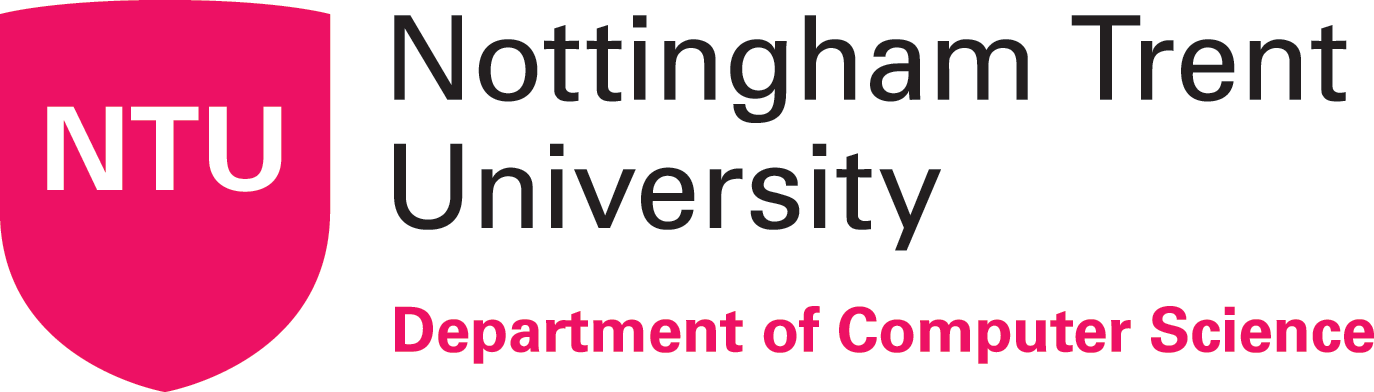

# Python Programming for Real World Data Analytics and GUI Development
## SOFT40161 - Introduction to Computer Programming
### Submission of the Coursework

## Name:
## NTU ID:

<font  color= 'red'> **The Full description of the Coursework is here -** </font>
<a href="https://now.ntu.ac.uk/d2l/le/content/1110621/viewContent/14307207/View">SOFT40161-Coursework (Click here)</a>

## Start your answer here-
<font  color= 'green'> **GitHub Link to access your activity.** </font>

Please add your Link here: <a href="https://github.com/">Update the link and text (Click here)</a>

## 1.5 Introduction

In [19]:
#Code Source SOFT40161_Lab10: Arif Rahman, Dan Buxton

# Useful functions for accessing remote files stored on Olympus
from pandas import DataFrame

def _blob_to_raw(url: str) -> str:
     """
     Convert an Olympus/Git-like 'blob' URL to the corresponding
     'raw/<repo_path>/refs/heads/<branch>/...' URL.
 
     Example:
       'https://.../blob/main/path/to/file.csv'
     -> 'https://.../raw/<repo_path>/refs/heads/main/path/to/file.csv'
     """
     from urllib.parse import urlsplit, urlunsplit
 
     parts = urlsplit(url)
     path = parts.path
 
     # already raw in the desired form
     if path.startswith('/raw/'):
         return url
     if '/blob/' not in path:
         return url
 
     before, _, after = path.partition('/blob/')
     new_path = '/raw' + before + '/refs/heads/' + after.lstrip('/')
     return urlunsplit((parts.scheme, parts.netloc, new_path, parts.query, parts.fragment))
 
def load_olympus_data(url: str) -> DataFrame:
     '''
     Load data from a password-protected URL into a pandas DataFrame by prompting the user for their NTU username and password for authentication.
 
     Parameters:
     url (str): The URL of the CSV file to load.
 
     Returns:
     DataFrame: A pandas DataFrame containing the loaded data.
     '''
     import requests, io, getpass, pandas as pd
 
     username = input('NTU username: ')
     password = getpass.getpass('NTU password: ')
 
     response = requests.get((_blob_to_raw(url)), auth=(username, password))
     response.raise_for_status()
 
     return pd.read_csv(io.StringIO(response.text), parse_dates = ["Date"])

# Section 1: Control Structures (12 marks)


## Explanation and Documentation 

### Real World Problem

Heating, ventilation and air conditioning consume large amounts of energy within buildings(ML source). To optimise energy usage and save costs, the systems can be driven by human occupancy of the building (ML source).

Sensors that measure environmental parameters such as heat, light, sound, CO2, and infrared instances can be used to determine real-time occupancy(ML source). Machine learning algorithms can be used to determine room occupancy  by using the features of the sensors(ML source). Video-based systems could be replaced with this cost-effective alternative and give energy savings of up to 30% when the occupancy pattern is known (ML source). Detecting room occupancy can help save energy,  but  predicting the precise number of occupants can make systems more adaptive and energy efficient (ML source).

The variability of data gives a range that can be determined from the maximum and minimum values of each variable (Basic statistical tools in research and data analysis). Knowing patterns of maximum and minimum points provides insights into daily trends in the room.

The data set that will be analysed in this report has 10129 entries and 18 features (ML repository). A challenge is to transform the data from its raw  form into more manageable subsets that can be used to derive relationships  through analysis and visualisations (The role of data transformation in modern analytics).  Data transformation, cleaning, filtering and aggregation are used to prepare the data for visualisation plot creation and machine learning (The role of data transformation in modern analytics). 

### Summarising the dataset

The experiment data from seven environmental sensors were collected over different dates between 22/12/2017 to 26/12/2017 and 10/01/2018 to 11/01/2018 (ML source). Four sensors collected temperature, light and sound measurements. One sensor collected CO2 data, and two sensors collected instances of motion by the door and window (ML source). Across the experiment's duration, up to three people would enter and leave the room (ML source). This information was collected manually with time stamps to track occupancy levels (ML source). 

The room is 6m x 4.6m  with four desks spaced equally, each with a sensor (ML source).  the CO2sensor is placed in the middle of the room, and infrared sensors are placed at the door and window (ML source).  Each sensor transmits data to a master receiver every 30 seconds. While the data was collected, no HVAC systems were used (ML source). Figure one shows the setup.

![Room Diagram](Figure1.png "Figure1")

Figure 1: Sensor configuration in the room

### Control Structures Use

The data is imported from its CSV file. A control Measure is used to import the number of rows the user specifies. In this case, all rows are imported. Test outputs are made to check that the import was successful.
 
To explore the data set, a menu is created to select different options that summarise the data. A test output is created to check whether the loop will work.

The user can make selections to view information on the mean values of sensors 1 to 5 and the summation of sensors 6 and 7 over the whole experiment. There is an option to get more details on the experiment and the variable measurement units. The menu utilises user inputs, for loops and if conditional statements (ref coding book).


In [7]:
#Importing Data File to Download Folder

#Code Source: 

import urllib.request

url = "https://archive.ics.uci.edu/static/public/864/data.csv"

file_path = "Occupancy_Estimation.csv"
urllib.request.urlretrieve(url, file_path)

print("Download succuessful, check your folder for the CSV file")

Download succuessful, check your folder for the CSV file


In [31]:
#Code Source: Sqlpey 2024
#Modified by: Dylan Butterfield

import csv

#Read CSV file and create output for n amount of rows

with open("Occupancy_Estimation.csv", "r") as csv_file:
    csvreader = csv.DictReader(csv_file)
    counter = 0
    row_storage_list = []
    for row in csvreader:
        if counter < 10129:
            #print(row)
            row_storage_list.append(row)
            counter += 1
        else: 
            break

#Checking output of first row of data

first_row = row_storage_list[0]

print("First row of dataset:",first_row)

print()

print("Checking date entry for the first row:",first_row["Date"])

First row of dataset: {'Date': '2017/12/22', 'Time': '10:49:41', 'S1_Temp': '24.94', 'S2_Temp': '24.75', 'S3_Temp': '24.56', 'S4_Temp': '25.38', 'S1_Light': '121', 'S2_Light': '34', 'S3_Light': '53', 'S4_Light': '40', 'S1_Sound': '0.08', 'S2_Sound': '0.19', 'S3_Sound': '0.06', 'S4_Sound': '0.06', 'S5_CO2': '390', 'S5_CO2_Slope': '0.769230769231', 'S6_PIR': '0', 'S7_PIR': '0', 'Room_Occupancy_Count': '1'}

Checking date entry for the first row: 2017/12/22


In [32]:
#Creating test ouput for Dataset Analysis Menu

#Find average temperature of sensor 1

Total_Sensor1_Temp = 0

for list_element_data in row_storage_list: 
    Sensor1_Temp = float(list_element_data["S1_Temp"])
    Total_Sensor1_Temp += Sensor1_Temp
    
print(f"Total Number of Rows: {len(row_storage_list)}")

print(f"Sum of Sensor 1 Temperature Values: {Total_Sensor1_Temp:.2f}°C")

Average_Sensor1_Temp = Total_Sensor1_Temp/len(row_storage_list)

print(f"Average Sensor 1 Temperature: {Average_Sensor1_Temp:.2f}°C")

Total Number of Rows: 10129
Sum of Sensor 1 Temperature Values: 257823.69°C
Average Sensor 1 Temperature: 25.45°C


In [34]:
#Dataset Analysis Menu showing summirisation of the dataset

#Run Function and Module Section First 

#Creation of menu screen.

print("Welcome to Occupancy Estimation Dataset Analysis Menu:")

#Code Source: Coderivers 2025
#Modified by: Dylan Butterfield

Menu_options = """1: Sensor 1 Average Values
2: Sensor 2 Average Values
3: Sensor 3 Average Values
4: Sensor 4 Average Values
5: Sensor 5 Average Values
6: Sensor 6 and 7 Total Number of Instances
7: Experiment Information 
8: Variable Information
9: Exit"""

Menu_paragraphs = Menu_options.split('\n')

for Menu_paragraph in Menu_paragraphs:
    print(Menu_paragraph.strip())

print()

#Output analysis based on menu selection
#Code Source: Techronology 2026
#Modified by: Dylan Butterfield

#Until break option is selected menu can be cycled to show data summarisations

while True: 
    
    option_input = ErrorCheck()
    
    if option_input == 1:
        
        Total_Sensor1_Temp = 0
        Total_Sensor1_Light = 0
        Total_Sensor1_Sound = 0
        
        for list_element_data in row_storage_list: 
            Sensor1_Temp = float(list_element_data['S1_Temp'])
            Total_Sensor1_Temp += Sensor1_Temp
            
            Sensor1_Light = int(list_element_data['S1_Light'])
            Total_Sensor1_Light += Sensor1_Light

            Sensor1_Sound = float(list_element_data['S1_Sound'])
            Total_Sensor1_Sound += Sensor1_Sound
            
        Average_Sensor1_Temp = Total_Sensor1_Temp/len(row_storage_list)
        Average_Sensor1_Light = Total_Sensor1_Light/len(row_storage_list)
        Average_Sensor1_Sound = Total_Sensor1_Sound/len(row_storage_list)

        
        print(f'Average Sensor 1 Temperature: {Average_Sensor1_Temp:.2f}°C')
        print(f'Average Sensor 1 Illuminance: {Average_Sensor1_Light:.2f}Lux')
        print(f'Average Sensor 1 Sound Measurement in Volts: {Average_Sensor1_Sound:.2f}V')
        print()
        
    elif option_input == 2:
        
        Total_Sensor2_Temp = 0
        Total_Sensor2_Light = 0
        Total_Sensor2_Sound = 0
        
        for list_element_data in row_storage_list: 
            Sensor2_Temp = float(list_element_data['S2_Temp'])
            Total_Sensor2_Temp += Sensor2_Temp
            
            Sensor2_Light = int(list_element_data['S2_Light'])
            Total_Sensor2_Light += Sensor2_Light

            Sensor2_Sound = float(list_element_data['S2_Sound'])
            Total_Sensor2_Sound += Sensor2_Sound
            
        Average_Sensor2_Temp = Total_Sensor2_Temp/len(row_storage_list)
        Average_Sensor2_Light = Total_Sensor2_Light/len(row_storage_list)
        Average_Sensor2_Sound = Total_Sensor2_Sound/len(row_storage_list)

        print(f'Average Sensor 2 Temperature: {Average_Sensor2_Temp:.2f}°C')
        print(f'Average Sensor 2 Illuminance: {Average_Sensor2_Light:.2f}Lux')
        print(f'Average Sensor 2 Sound Measurement in Volts: {Average_Sensor2_Sound:.2f}V')
        print()
        
    elif option_input == 3:
        Total_Sensor3_Temp = 0
        Total_Sensor3_Light = 0
        Total_Sensor3_Sound = 0
        
        for list_element_data in row_storage_list: 
            Sensor3_Temp = float(list_element_data['S3_Temp'])
            Total_Sensor3_Temp += Sensor3_Temp
            
            Sensor3_Light = int(list_element_data['S3_Light'])
            Total_Sensor3_Light += Sensor3_Light

            Sensor3_Sound = float(list_element_data['S3_Sound'])
            Total_Sensor3_Sound += Sensor3_Sound
            
        Average_Sensor3_Temp = Total_Sensor3_Temp/len(row_storage_list)
        Average_Sensor3_Light = Total_Sensor3_Light/len(row_storage_list)
        Average_Sensor3_Sound = Total_Sensor3_Sound/len(row_storage_list)

        print(f'Average Sensor 3 Temperature: {Average_Sensor3_Temp:.2f}°C')
        print(f'Average Sensor 3 Illuminance: {Average_Sensor3_Light:.2f}Lux')
        print(f'Average Sensor 3 Sound Measurement in Volts: {Average_Sensor3_Sound:.2f}V')
        print()
        
    elif option_input == 4:
        Total_Sensor4_Temp = 0
        Total_Sensor4_Light = 0
        Total_Sensor4_Sound = 0
        
        for list_element_data in row_storage_list: 
            Sensor4_Temp = float(list_element_data['S4_Temp'])
            Total_Sensor4_Temp += Sensor4_Temp
            
            Sensor4_Light = int(list_element_data['S4_Light'])
            Total_Sensor4_Light += Sensor4_Light

            Sensor4_Sound = float(list_element_data['S4_Sound'])
            Total_Sensor4_Sound += Sensor4_Sound
            
        Average_Sensor4_Temp = Total_Sensor4_Temp/len(row_storage_list)
        Average_Sensor4_Light = Total_Sensor4_Light/len(row_storage_list)
        Average_Sensor4_Sound = Total_Sensor4_Sound/len(row_storage_list)

        print(f'Average Sensor 4 Temperature: {Average_Sensor4_Temp:.2f}°C')
        print(f'Average Sensor 4 Illuminance: {Average_Sensor4_Light:.2f}Lux')
        print(f'Average Sensor 4 Sound Measurement in Volts: {Average_Sensor4_Sound:.3f}V')
        print()
        
    elif option_input == 5:
        Total_Sensor5_CO2 = 0
        Total_Sensor5_CO2_Slope = 0

        for list_element_data in row_storage_list: 
            Sensor5_CO2 = int(list_element_data['S5_CO2'])
            Sensor5_CO2_Slope = float(list_element_data['S5_CO2_Slope'])
            
            Total_Sensor5_CO2 += Sensor5_CO2
        
            Total_Sensor5_CO2_Slope += Sensor5_CO2_Slope
            
        Average_Sensor5_CO2 = Total_Sensor5_CO2/len(row_storage_list)
        Average_Sensor5_CO2_Slope = Total_Sensor5_CO2_Slope/len(row_storage_list)
        
        print(f'Average Sensor 5 CO2 Reading: {Average_Sensor5_CO2:.2f}')
        print(f'Average Sensor 5 CO2 Slope Gradient: {Average_Sensor5_CO2_Slope:.4f}')    
        print()
        
    elif option_input == 6:
        
        Total_Sensor6_Passive_Infrared_Instances = 0
        Total_Sensor7_Passive_Infrared_Instances = 0

        for list_element_data in row_storage_list: 
            Sensor6_Passive_Infrared = int(list_element_data['S6_PIR'])
            Sensor7_Passive_Infrared = int(list_element_data['S7_PIR'])
            
            Total_Sensor6_Passive_Infrared_Instances += Sensor6_Passive_Infrared
            Total_Sensor7_Passive_Infrared_Instances += Sensor7_Passive_Infrared
            
        print(f'Total number of passive infrared instances from Sensor 6: {Total_Sensor6_Passive_Infrared_Instances}')
        print(f'Total number of passive infrared instances from Sensor 7: {Total_Sensor7_Passive_Infrared_Instances}')
        print()
        
    elif option_input == 7:
        
        info = """This experiment data was collected from seven sensors over a period of time between 22/12/2017 to 26/12/2017 and 
        10/01/2018 to 11/01/2018. 
        During this time up to three people would enter and leave the room.
        Four sensors collected temperature, light and sound data. One sensor collected CO2 data. Two sensors collected instances of 
        motion detection.
        The sensors tracked changes in each variable as room occupancy changed.
        """
        info_paragraphs = info.split('\n')
        for info_paragraph in info_paragraphs:
            print(info_paragraph.strip())
        print()
        
    elif option_input == 8:
        text = """Variable Information:
        
        Date: DD/MM/YYYY
        Temperature: Degree Celsius
        Light: Lux
        Sound: Volts (amplifier output read by ADC)
        CO2: PPM (Parts Per Million)
        CO2 Slope: Slope of CO2 values taken in a sliding window.
        Passive Infrared: Binary value conveying motion detection.
        Room_Occupancy_Count: Number of occupant recorded in the room.
        """
        paragraphs = text.split('\n')
        for paragraph in paragraphs:
            print(paragraph.strip())
        print()
        
    elif option_input == 9:
        print("Thank you for visiting.")
        break


Welcome to Occupancy Estimation Dataset Analysis Menu:
1: Sensor 1 Average Values
2: Sensor 2 Average Values
3: Sensor 3 Average Values
4: Sensor 4 Average Values
5: Sensor 5 Average Values
6: Sensor 6 and 7 Total Number of Instances
7: Experiment Information
8: Variable Information
9: Exit



Select a value from the menu: 1


Average Sensor 1 Temperature: 25.45°C
Average Sensor 1 Illuminance: 25.45Lux
Average Sensor 1 Sound Measurement in Volts: 0.17V



Select a value from the menu: 2


Average Sensor 2 Temperature: 25.55°C
Average Sensor 2 Illuminance: 26.02Lux
Average Sensor 2 Sound Measurement in Volts: 0.12V



Select a value from the menu: 3


Average Sensor 3 Temperature: 25.06°C
Average Sensor 3 Illuminance: 34.25Lux
Average Sensor 3 Sound Measurement in Volts: 0.16V



Select a value from the menu: 4


Average Sensor 4 Temperature: 25.75°C
Average Sensor 4 Illuminance: 13.22Lux
Average Sensor 4 Sound Measurement in Volts: 0.104V



Select a value from the menu: 5


Average Sensor 5 CO2 Reading: 460.86
Average Sensor 5 CO2 Slope Gradient: -0.0048



Select a value from the menu: 6


Total number of passive infrared instances from Sensor 6: 913
Total number of passive infrared instances from Sensor 7: 806



Select a value from the menu: 7


This experiment data was collected from seven sensors over a period of time between 22/12/2017 to 26/12/2017 and
10/01/2018 to 11/01/2018.
During this time up to three people would enter and leave the room.
Four sensors collected temperature, light and sound data. One sensor collected CO2 data. Two sensors collected instances of
motion detection.
The sensors tracked changes in each variable as room occupancy changed.




Select a value from the menu: 8


Variable Information:

Date: DD/MM/YYYY
Temperature: Degree Celsius
Light: Lux
Sound: Volts (amplifier output read by ADC)
CO2: PPM (Parts Per Million)
CO2 Slope: Slope of CO2 values taken in a sliding window.
Passive Infrared: Binary value conveying motion detection.
Room_Occupancy_Count: Number of occupant recorded in the room.




Select a value from the menu: 9


Thank you for visiting.


## Reflection on results 

### Key Findings and Reflection

The outputs from the analysis menu show that the average temperature across the experiment was similar for each sensor. There were only slight variations after the decimal point, and it can be assumed that the average temperature is generally uniform.

The average light output for sensors 1 and 2 was similar. Sensor 4 has a much lower average quantity, which could be due to the placement of the desk, causing the sensor to have less access to natural light.  Another reason could potentially be that the occupants were not switching the light on at desk 4 as much as at other desks (ML source).

The average sound measurement was in the same order of magnitude; an assumption can be made that the sound levels at each sensor are uniform on average. 

The average concentration of CO2 is in line with a typical value of an occupied indoor space with good air exchange (CO2 source).

There were more instances recorded at the door compared to the window area. This could be due to occupants needing to use the door to enter and exit the room, while occupants were not necessarily required to pass close to the window.

### Limitations

All the  outputs provided so far are averages taken across the whole experiment. The values are more influenced by the times when room occupancy is 0. An inspection of the data set shows this is more of an occurrence than an occupancy level 1 to 3. This can lead to more skewed  averages when no one is in the room.  These descriptive statistics give us an idea of what has happened over the whole experiment, but they cannot be used on their own to make predictions of room occupancy. It does indicate an average baseline for each variable across the whole experiment.


# Section 2: Functions and Modules (16 marks)  

## Explanation and Documentation 

### Function Details

Different functions have been created that are used throughout the project. A brief explanation can be provided for each function.

**Error check**: This is used in the analysis menu. It takes an input from the user and assesses whether it is an integer in the accepted range of 1 to 9. A try, except, else  block is used to handle errors. If the user enters a number that is not an integer within the accepted range or a character, it will prompt the user to reselect their option. Once the correct option is selected, it returns the value that is used in the menu selection (ref error handling stack).

**Null checker**: The purpose of this function is to inform the user of the number of nulls that are present in each column. It allows the user to see if their data set has missing values in each column (ref book).

**Null handling**: This function is used to clean the data set. It assesses rows with null data and whether they need to be removed if the number of null values present is small compared to the size of the data set. If the number of null data is large compared to the size of the data set, the function determines the column data type and inputs the median column value or inputs a message to inform the user that additional data is required if the missing data is a string or an object (ref book).   

**Row duplication**: This allows the user to add additional rows to their dataset. The function has been created to demonstrate an example of removing duplicate rows from a dataset. However, it can be a useful function when row duplication is required (ref book).

**Max daily values**: The function finds the maximum values recorded for each variable on each date from the dataset. A new dataset is created that can be used to easily access the maximum values. The new dataset can be used for filtering or analysis (ref book).

**Min daily values**: Performs similarly to max daily function, but transforms the data into a new dataset with the minimum values for each variable on each date (ref book).

**Machine learning functions**: Perform linear discriminant and quadratic discriminant analysis (ref LDA and QDA, ML source). The two functions have been created to train on selected dataset features and output predicted occupancy. The first function uses only data from each temperature sensor, while the second function uses all features. The returned outputs can be used to find the accuracy score, classification report and confusion matrix (ref features, ML Source refs).

**Graph selection**: This is used to select plots from a list box within the GUI. It calls the display plot function to show the plot in the GUI.

**Display plot**: This function is called within the graph selection function. Based on the selection from the list box, the function removes the previous plot from the GUI and shows the new selected plot.  

### Rationale for modularising code

Modularising code provides the following benefits:

- **Reuseability**: When the code is repeated many times in a program, turning it into a function block makes the code easier to maintain (ref levelup). When changes are required, only one update is needed in the program (ref levelup).
- **Complexity**: The code is split into two understandable sections, reducing its complexity (ref levelup). It improves code readability (ref levelup).
- **Code Testability**: Functions make testing large programs easier (ref levelup). The program's robustness is enhanced. 

### Use of external modules

Each function utilises methods from external modules to complete actions within the code block. The modules allow for more complex functions to be created. 


In [35]:
#Importing data handling libraries

import pandas as pd
import numpy as np

#Importing machine learning library

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

#Importing graphing library

import matplotlib.pyplot as plt
import seaborn as sns

#Importing GUI library and modules

import tkinter as tk
from tkinter import *
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

#Try, Except function to check for correct user input

#Code Source: Stack Overflow 2019
#Modified by: Dylan Butterfield

def ErrorCheck():
   while True: 
    #Takes user input and coverts to integer
    
    try:
       Number = int(input("Select a value from the menu:"))
    
    #If character is inputted or number is out of range function asks for new input
    
    except ValueError:
        print("Input cannot have characters, it must be between an integer 1 to 9, please try again.")
        print()
        continue

    #If number is within range, number is returned and loop is broken
        
    if Number > 0 and Number < 10:
        return Number
        break     
    else:
        print("Input can only be an integer between 1 to 9, please try again.")
        print()

#Function to check for null values in dataset

#Code Source: McKinney 2022, Stack Overflow 2023
#Modified by: Dylan Butterfield

def null_checker(df):

    #Headings put in a list
    
    column_headings = df.columns.tolist()
    
    #Null array created
    
    null = df.isnull()

    #Null array counted and outputted printed
    
    for heading in column_headings:
        null_count = null.value_counts(heading)
        print(null_count)
        print()
      
#Function to handle null values in dataset   

#Code Source: McKinney 2022, Pandas 2026, Stack Overflow 2020, Stack Overflow 2023
#Modified by: Dylan Butterfield

def null_handling(df):

    #Headings put in a list

    column_headings = df.columns.tolist()

    #Null array created
    
    null = df.isnull()
    
    #Number of null for each column summed
    
    Total_nulls_per_column = null.sum()

    #Returning DataFrame data types
    
    d_types = df.dtypes

    #Creating empty list
    
    Percentage_Null_List = []

    #Finding percentage of nulls for each column
    
    for heading in column_headings:
        Percentage_Null = Total_nulls_per_column[heading]/len(df[heading]) 
        Percentage_Null_List.append(Percentage_Null)  

    #Checks the maximum percentage of nulls and if less than set amount rows are dropped and DataFrame returned
    
    if max(Percentage_Null_List) <= 0.01:
        df = df.dropna()
        return df
    
    #If maximum percentage of nulls greater than set amount, columns filled with median for numerical data type and text for object data type
    
    else:
        for heading in column_headings: 
            if d_types[heading] == object:
                df[heading] = df[heading].fillna("Data Needs Filling")
            elif d_types[heading] == float or d_types[heading] == int:
                df[heading] = df[heading].fillna(df[heading].median())
        
        #DataFrame returned
        
        return df     

#Function to create row duplicates in dataset

#Code Source: McKinney 2022, Pandas 2026c, Pandas 2026a
#Modified by: Dylan Butterfield

def row_duplication(df):
    
    #Empty row created
    
    row_list = []

    #Tells the user the number of rows and indexes in DataFrame
    
    print(f'The dataset has {len(df)} rows and {len(df)-1} indexes. Pick which rows to duplicate:')
    print()

    #Asks for row index input
    
    range_input1 = input("Pick a starting row from index 0:") 
    range_input2 = input("Pick index of final row and add 1 to input:")

    #Creating additional rows and merging the duplicated rows with original DataFrame. DataFrame returned and message printed
    
    for row_index in range(int(range_input1), int(range_input2)):
        row_slice = df.iloc[row_index,:]
        row_list.append(row_slice)
    df_duplicate_entries =  pd.DataFrame(row_list)
    df_duplicate_handling = pd.concat([df,df_duplicate_entries], ignore_index = True)
    print(f'An additional {len(df_duplicate_handling)-len(df)} rows have been added.')
    return df_duplicate_handling
    
#Function to create DataFrame of maximum values for variables each day.

#Code Source: Stack Overflow 2022, Pandas 2026d, Stack Overflow 2023, Vasiliev 2022
#Modified by: Dylan Butterfield

def max_daily_values(df):

    #Headings put in a list
    
    column_headings = df.columns.tolist()

    #Heading list sliced
    
    new_column_headings = column_headings[2:15]
    
    #Date column extracted
    
    df_date = df["Date"]

    #Unique dates found
    
    dates = df_date.unique()

    #Empty dictionary created for max values
        
    date_dic_max_values = {}

    #Loop finds max values for each date and each column. Max values for each column stored in dictionary.
    #Max values for each day stored in main dictionary. Date dictionary copied to ensure values do not change in next iteration
    
    for i in range(len(dates)): 
        date_dic = {}
        for headings in new_column_headings:
            filter_date = df.loc[df["Date"] == dates[i] , [headings]]
            max_value = filter_date[headings].max()
            date_dic[headings] = max_value
        date_dic_max_values[dates[i]] = date_dic.copy()
    Max_Value_df = pd.DataFrame(date_dic_max_values)
    return Max_Value_df

#Function to create DataFrame of minimum values for variables each day.

#Code Source: Stack Overflow 2022, Pandas 2026d, Stack Overflow 2023, Vasiliev 2022
#Modified by: Dylan Butterfield

def min_daily_values(df):

    #Headings put in a list
    
    column_headings = df.columns.tolist()
    
    #Heading list sliced

    new_column_headings = column_headings[2:15]

    #Date column extracted

    df_date = df["Date"]

    #Unique dates found

    dates = df_date.unique()

    #Empty dictionary created for min values

    date_dic_min_values = {}

    #Loop finds min values for each date and each column. Min values for each column stored in dictionary.
    #Min values with columns stored in main dictionary for each date. Date dictionary copied to ensure values do not change in next iteration
    
    for i in range(len(dates)): 
        date_dic = {}
        for headings in new_column_headings:
            filter_date = df.loc[df["Date"] == dates[i] , [headings]]
            min_value = filter_date[headings].min()
            date_dic[headings] = min_value
        date_dic_min_values[dates[i]] = date_dic.copy()
    Min_Value_df = pd.DataFrame(date_dic_min_values)
    return Min_Value_df

#Machine learning traning function temperature variables 

#Coding Source: Ozdemir and Susarla 2018, GeeksforGeeks 2025b, SKLearner 2024, GeeksforGeeks 2025a
#Modified: Dylan Butterfield

def ML_LDA_QDA_Temperature_Variables(df):
    
    #Getting X and Y values
    
    X = df.iloc[:, 2:6]
    Y = df.loc[:, "Room_Occupancy_Count"]

    #Training dataset
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, train_size = 0.2, random_state = 42)

    #LDA run and fitted
    
    lda = LinearDiscriminantAnalysis(solver = "eigen", shrinkage = "auto")
    lda.fit(X_train, Y_train)
    
    #Y value predicted
    
    Y_predict_lda = lda.predict(X_test)

    #QDA run and fitted
    
    qda = QuadraticDiscriminantAnalysis(reg_param = 0.025)
    qda.fit(X_train, Y_train)
    
    #Y value predicated
    
    Y_predict_qda = qda.predict(X_test)

    #Variables returned
    
    return Y_test, Y_predict_lda, Y_predict_qda
 
#Machine learning training function all variables

def ML_LDA_QDA_All_Variables(df):
    
    #Getting X and Y values
    
    X = df.iloc[:, 2:18]
    Y = df.loc[:, "Room_Occupancy_Count"]

    #Training dataset

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, train_size = 0.2, random_state = 42)

    #LDA run and fitted

    lda = LinearDiscriminantAnalysis(solver = "eigen", shrinkage = "auto")
    lda.fit(X_train, Y_train)
    
    #Y value predicted
  
    Y_predict_lda = lda.predict(X_test)
    
    #QDA run and fitted

    qda = QuadraticDiscriminantAnalysis(reg_param = 0.8)
    qda.fit(X_train, Y_train) 

    #Y value predicated

    Y_predict_qda = qda.predict(X_test)

    #Variables returned

    return Y_test, Y_predict_lda, Y_predict_qda

#Code Source: Arif Rahman 2024, Python Tutorial 2021, GeeksforGeeks 2025a
#Modified by: Dylan Butterfield

#GUI Graph Selection Function

def graph_selection(event):

    #Creation of figure list to put in GUI
    
    figure_list = [fig_Light, fig_CO2, fig_Occupancy, pairplot1_gui.fig, heatmap_plot_gui.figure, violin_plot.figure, fig_event, fig_confusion]

    #Gets currently selected list item
    
    index_selection = listbox.curselection()

    #For list item selection display plot function is called for the figure in list
    
    for list in index_selection:
        if list == 0:
            display_plot(figure_list[0])
        elif list == 1:
            display_plot(figure_list[1])
        elif list == 2:
            display_plot(figure_list[2])
        elif list == 3:
            display_plot(figure_list[3])
        elif list == 4:
            display_plot(figure_list[4])
        elif list == 5:
            display_plot(figure_list[5])
        elif list == 6:
            display_plot(figure_list[6])
        elif list == 7:
            display_plot(figure_list[7])

#GUI Function to Display Plots 

#Code Source: Arif Rahman 2024
#Modified by: Dylan Butterfield

def display_plot(fig):

    #Clears previous figure
    
    for widget in plot_frame.winfo_children():
        widget.destroy()
    
    #Puts plot on canvas within frame
    
    canvas = FigureCanvasTkAgg(fig, master=plot_frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

print("Functions have run")

Functions have run


In [36]:
#Function Test

Output = ErrorCheck()
print(f"Successfully broke loop and returned output:{Output}")


Select a value from the menu: Hello


Input cannot have characters, it must be between an integer 1 to 9, please try again.



Select a value from the menu: &&&&


Input cannot have characters, it must be between an integer 1 to 9, please try again.



Select a value from the menu: 100


Input can only be an integer between 1 to 9, please try again.



Select a value from the menu: 0.5


Input cannot have characters, it must be between an integer 1 to 9, please try again.



Select a value from the menu: 4.5


Input cannot have characters, it must be between an integer 1 to 9, please try again.



Select a value from the menu: 5


Successfully broke loop and returned output:5


## Reflection on results 

### Project Contribute

All the functions that have been created are used throughout the project. The functions can be tested with test data to check functionality. The function can be embedded within different sections and called when each section is run.

An example function test is shown for the error check function. The desired output shows that the function will return the correct user input and ask for a new input if the value entered is incorrect.


# Section 3: Data Handling with Pandas (16 marks)  

## Explanation and Documentation 

### Data handling processes

**Importing and Inspecting Dataset**

The dataset is imported into the Jupyter notebook. The first and last 5 rows are printed using the head and tail methods. The purpose of this step is to inspect the dataset and check that it has been imported correctly. The information method is used to show column heading names, the number of rows, the number of indexes and column datatypes. This information is useful to know when writing code for other data handling processes.

**Cleaning**

The null checker function is called using the DataFrame as an input. The duplicate method is run to check for any duplicated rows. The dataset is found to be clean and has no duplicates. 

To show data cleaning examples, a small and a large number of null values were entered into a copy of the DataFrame. The null checker function is called in both examples, and the number of nulls for each column is specified. The null checker function is called, and the updated DataFrame is returned. Rerunning the null checker function shows whether the null rows were removed or additional data was added to fill the null values.

An example is created to show how duplicate rows can be identified and removed. The row duplication function is called, and the user is prompted to enter the number of rows they want to duplicate. A message is returned to inform the user of the number of additional rows that have been duplicated. The duplicate and count method outputs a table detailing the number of duplicated rows. The drop duplicate method is used to remove duplicates. This shows that if a dataset has duplicated rows, the program can handle them. 

**Filtering and Aggregation** 

One of the objectives of the project is to create subsets of the data detailing the maximum and minimum daily values for sensors 1, 2, 3 and 4. Using these values, the main DataFrame can be filtered into subsets that can be further analysed. The max and min daily value functions are called, and multiple filters are made to find rows in the DataFrame that meet a date and maximum or minimum value condition. The subset of the DataFrame is stored and can be further filtered to investigate different variables. 

The dataset is aggregated to find the daily average occupancy, the daily average sensors 1 to 5 values and the daily number of recorded instances for sensors 6 and 7. 

Within this section varaibles are stored to be used in the creation of visualisations in the section 4. Columns are stored in x and y variables to be used in line plotting. A filter is applied to obtain temperature and CO2 variables for each date can be used in a pairplot. 

The DataFrame is transformed to output a new DataFrame that can be used to make a heat map of CO2 values. For the heatmap, the following dates were chosen: 22/12/2017, 23/12/2017, 25/12/2017. These dates were picked as they each had time values spanning from 11:00 to 23:00. The DataFrame's number of rows was reduced to show only hours and minutes. Each CO2 value needed to have time values that intersected each date, and it was found that two times were missing for 23/12/2017. It was assumed the CO2 values would not have changed between 16:37 and 16:40. The 16:37 CO2 values were chosen for 16:38 and 16:39.   

The DataFrame was filtered for a violin plot, and the following dates were chosen: 22/12/2017, 23/12/2017, and 10/01/2018. The dates were chosen as room occupancy was recorded on each one.

Filters were applied to create a DataFrame for an event plot. A similar approach to the heat map DataFrame was used. Once the relevant data had been filtered, a new column called time number was added. Each time value has an associated number. When the last filter is applied to find when instances occurred, a list of time numbers is obtained for both sensors that can be used in the event plot.

**Machine Learning**

The machine learning functions are called to do linear discriminant and quadratic discriminant analysis on the DataFrame to predict occupancy count. The Y test and Y predicted values are the stored variables. For each analysis type, an accuracy score, a classification report and a confusion matrix are the outputs.   

Data is trained to be used in a random forest classifier to predict room occupancy. A classification report is produced to show accuracy and F1-scores.


In [37]:
import pandas as pd
import numpy as np

#Creating DataFrame

#Code Source: McKinney 2022, Pandas 2026d, Arif Rahman 2025

df = load_olympus_data("https://olympus.ntu.ac.uk/N1423084/SOFT40161_Intro-to-Computer-Programming/blob/main/Assessment/Occupancy_Estimation.csv")

#Changing date column format to string

df["Date"] = df["Date"].dt.strftime("%d/%m/%Y") 

#Checking first and last 10 entries of dataset
print(df.head(5))

print(df.tail(5))

print()

#Printing DataFrame summary

df.info()

NTU username:  N1423084
NTU password:  ········


         Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  22/12/2017  10:49:41    24.94    24.75    24.56    25.38       121   
1  22/12/2017  10:50:12    24.94    24.75    24.56    25.44       121   
2  22/12/2017  10:50:42    25.00    24.75    24.50    25.44       121   
3  22/12/2017  10:51:13    25.00    24.75    24.56    25.44       121   
4  22/12/2017  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0       

In [22]:
#In case load olypus function does not work run this to get DataFrame

df = pd.read_csv('Occupancy_Estimation.csv', parse_dates = ["Date"])

#Changing date column format to string

df["Date"] = df["Date"].dt.strftime("%d/%m/%Y") 

#Checking first and last 10 entries of dataset
print(df.head(5))

print(df.tail(5))

print()

#Printing DataFrame summary

df.info()

         Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  22/12/2017  10:49:41    24.94    24.75    24.56    25.38       121   
1  22/12/2017  10:50:12    24.94    24.75    24.56    25.44       121   
2  22/12/2017  10:50:42    25.00    24.75    24.50    25.44       121   
3  22/12/2017  10:51:13    25.00    24.75    24.56    25.44       121   
4  22/12/2017  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0       

In [38]:
#Checking Raw Dataset For Missing Values

#Calling null checker function

null_checker(df)

#Code Source: McKinney 2022

#Showing dataset has no duplicates

print(df.duplicated().value_counts())

Date
False    10129
Name: count, dtype: int64

Time
False    10129
Name: count, dtype: int64

S1_Temp
False    10129
Name: count, dtype: int64

S2_Temp
False    10129
Name: count, dtype: int64

S3_Temp
False    10129
Name: count, dtype: int64

S4_Temp
False    10129
Name: count, dtype: int64

S1_Light
False    10129
Name: count, dtype: int64

S2_Light
False    10129
Name: count, dtype: int64

S3_Light
False    10129
Name: count, dtype: int64

S4_Light
False    10129
Name: count, dtype: int64

S1_Sound
False    10129
Name: count, dtype: int64

S2_Sound
False    10129
Name: count, dtype: int64

S3_Sound
False    10129
Name: count, dtype: int64

S4_Sound
False    10129
Name: count, dtype: int64

S5_CO2
False    10129
Name: count, dtype: int64

S5_CO2_Slope
False    10129
Name: count, dtype: int64

S6_PIR
False    10129
Name: count, dtype: int64

S7_PIR
False    10129
Name: count, dtype: int64

Room_Occupancy_Count
False    10129
Name: count, dtype: int64

False    10129
Name: count, dtype

In [39]:
#Examples to show null handling of missing data

#Removal of null rows when the number of missing data is too few.

#Code Source: Stack Overflow 2022b, Stack Overflow 2021  

#Copying DataFrame

df_cleaning_example1 = df.copy()

#Adding null values

df_cleaning_example1.iloc[180:200,:] = np.nan

#Calling function

null_checker(df_cleaning_example1)

ex1 = null_handling(df_cleaning_example1)

#Calling function to show changes

null_checker(ex1)

Date
False    10109
True        20
Name: count, dtype: int64

Time
False    10109
True        20
Name: count, dtype: int64

S1_Temp
False    10109
True        20
Name: count, dtype: int64

S2_Temp
False    10109
True        20
Name: count, dtype: int64

S3_Temp
False    10109
True        20
Name: count, dtype: int64

S4_Temp
False    10109
True        20
Name: count, dtype: int64

S1_Light
False    10109
True        20
Name: count, dtype: int64

S2_Light
False    10109
True        20
Name: count, dtype: int64

S3_Light
False    10109
True        20
Name: count, dtype: int64

S4_Light
False    10109
True        20
Name: count, dtype: int64

S1_Sound
False    10109
True        20
Name: count, dtype: int64

S2_Sound
False    10109
True        20
Name: count, dtype: int64

S3_Sound
False    10109
True        20
Name: count, dtype: int64

S4_Sound
False    10109
True        20
Name: count, dtype: int64

S5_CO2
False    10109
True        20
Name: count, dtype: int64

S5_CO2_Slope
False    10

In [12]:
#Examples to show null handling of missing data

#Handling null data row when a large amount of data is missing

#Code Source: Stack Overflow 2022b, Stack Overflow 2021  

#Copying DataFrame

df_cleaning_example2 = df.copy()

#Adding null values

df_cleaning_example2.iloc[np.r_[800:1000,6425:6725],:] = np.nan

#Calling function

null_checker(df_cleaning_example2)

ex2 = null_handling(df_cleaning_example2)

#Calling function to show changes

null_checker(ex2)

Date
False    9629
True      500
Name: count, dtype: int64

Time
False    9629
True      500
Name: count, dtype: int64

S1_Temp
False    9629
True      500
Name: count, dtype: int64

S2_Temp
False    9629
True      500
Name: count, dtype: int64

S3_Temp
False    9629
True      500
Name: count, dtype: int64

S4_Temp
False    9629
True      500
Name: count, dtype: int64

S1_Light
False    9629
True      500
Name: count, dtype: int64

S2_Light
False    9629
True      500
Name: count, dtype: int64

S3_Light
False    9629
True      500
Name: count, dtype: int64

S4_Light
False    9629
True      500
Name: count, dtype: int64

S1_Sound
False    9629
True      500
Name: count, dtype: int64

S2_Sound
False    9629
True      500
Name: count, dtype: int64

S3_Sound
False    9629
True      500
Name: count, dtype: int64

S4_Sound
False    9629
True      500
Name: count, dtype: int64

S5_CO2
False    9629
True      500
Name: count, dtype: int64

S5_CO2_Slope
False    9629
True      500
Name: count, 

In [40]:
#Handling duplicates

#Example to show handling of duplicated rows

#Code Source: McKinney 2022, Stack Overflow 2022b 

#Creating DataFrame copy

df_duplicate_example = df.copy()

#Calling function

df_duplicate_handling = row_duplication(df_duplicate_example)

print()

#Showing number of duplicated rows

print(f"Showing the number of unique rows compared to duplicated rows:") 
print(df_duplicate_handling.duplicated().value_counts())

print()

#Dropping duplicated rows

print(f"Duplicate rows have been dropped and there are {len(df_duplicate_handling.drop_duplicates())} number of rows remaining.")

The dataset has 10129 rows and 10128 indexes. Pick which rows to duplicate:



Pick a starting row from index 0: 10
Pick index of final row and add 1 to input: 20


An additional 10 rows have been added.

Showing the number of unique rows compared to duplicated rows:
False    10129
True        10
Name: count, dtype: int64

Duplicate rows have been dropped and there are 10129 number of rows remaining.


In [41]:
#Calling function to find maximum daily values of selected sensors

Max_df = max_daily_values(df)

Max_df

,22/12/2017,23/12/2017,24/12/2017,25/12/2017,26/12/2017,10/01/2018,11/01/2018
S1_Temp,26.38,26.31,25.44,25.50,25.44,26.00,25.25
S2_Temp,29.00,27.19,25.44,25.50,25.44,26.50,25.31
S3_Temp,26.19,26.00,25.00,25.44,25.00,25.88,24.88
S4_Temp,26.56,26.50,25.81,26.31,25.88,26.00,25.44
S1_Light,165.00,163.00,7.00,20.00,6.00,149.00,6.00
S2_Light,258.00,254.00,7.00,24.00,7.00,239.00,7.00
S3_Light,280.00,206.00,37.00,89.00,34.00,186.00,34.00
S4_Light,74.00,65.00,24.00,64.00,23.00,36.00,22.00
S1_Sound,3.84,3.88,0.13,0.31,0.16,3.83,0.11
S2_Sound,3.44,3.44,0.12,0.34,0.12,3.44,0.08


In [42]:
#Filtering maximum temperature for sensor 1 to cross check with new DataFrame

#Code Source: Vasiliev 2022, McKinney 2022, GeeksforGeeks 2025a

filter_date_max = df.loc[df["Date"] == "22/12/2017", ["S1_Temp"]] 

print("S1_Temp on 22/12/2017 is:",filter_date_max["S1_Temp"].max())

S1_Temp on 22/12/2017 is: 26.38


In [43]:
#Filtering Main DataFrame to show times of maximum light values of sensor 3

#Code Source: Vasiliev 2022, McKinney 2022, GeeksforGeeks 2025a

filter_max_S3_Light_22_12_17 = df[(df["Date"] == "22/12/2017" ) & (df["S3_Light"] == Max_df.iloc[6,0])]

filter_max_S3_Light_22_12_17 

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
262,22/12/2017,13:32:34,26.00,27.50,25.88,26.31,165,254,280,72,0.92,0.43,0.42,0.29,870,1.376923,1,1,2
304,22/12/2017,13:54:00,26.13,27.13,26.06,26.31,165,257,280,73,0.09,0.32,0.13,0.07,915,1.630769,1,0,3
311,22/12/2017,13:57:35,26.13,27.06,26.06,26.31,165,256,280,73,0.53,0.09,0.16,0.09,935,2.280769,0,0,3
318,22/12/2017,14:01:09,26.13,27.06,26.00,26.50,165,257,280,73,0.14,0.15,0.19,0.10,925,1.238462,1,0,3
321,22/12/2017,14:02:41,26.19,27.06,26.00,26.38,165,256,280,73,0.08,0.07,0.22,0.08,940,1.242308,1,1,3
326,22/12/2017,14:05:14,26.19,27.19,26.06,26.31,165,255,280,73,0.09,0.43,0.18,0.07,965,1.534615,0,1,3


In [54]:
#Further DataFrame Filtering to show sensor 6, 7 and room occupancy at maximum light values of sensor 3

#Code Source: Vasiliev 2022, McKinney 2022, GeeksforGeeks 2025a

filter_column_headings = ["Time", "S6_PIR", "S7_PIR", "Room_Occupancy_Count"]

filter_max_S3_Light_22_12_17.loc[:,filter_column_headings]


,Time,S6_PIR,S7_PIR,Room_Occupancy_Count
262,13:32:34,1,1,2
304,13:54:00,1,0,3
311,13:57:35,0,0,3
318,14:01:09,1,0,3
321,14:02:41,1,1,3
326,14:05:14,0,1,3


In [45]:
#Creating filtered DataFrame of all instances of maximum sensor 1 to 5 values for each date

#Code Source: Vasiliev 2022, McKinney 2022, GeeksforGeeks 2025a, Pandas 2026a 

pd.set_option('display.max_rows', 101)

filter_date_22_12_17 = df[(df["Date"] == "22/12/2017" ) & ((df["S1_Temp"] == Max_df.iloc[0,0]) | (df["S2_Temp"] == Max_df.iloc[1,0]) | (df["S3_Temp"] == Max_df.iloc[2,0]) | (df["S4_Temp"] == Max_df.iloc[3,0]) | (df["S1_Light"] == Max_df.iloc[4,0])| (df["S2_Light"] == Max_df.iloc[5,0]) | (df["S3_Light"] == Max_df.iloc[6,0])| (df["S4_Light"] == Max_df.iloc[7,0]) | (df["S1_Sound"] == Max_df.iloc[8,0])| (df["S2_Sound"] == Max_df.iloc[9,0]) | (df["S3_Sound"] == Max_df.iloc[10,0]) | (df["S4_Sound"] == Max_df.iloc [11,0]) |(df["S5_CO2"] == Max_df.iloc[12,0]))]

filter_date_22_12_17

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
9,22/12/2017,10:54:17,25.00,24.81,24.56,25.50,101,34,57,43,3.84,0.64,0.48,0.39,390,-0.188462,1,1,1
128,22/12/2017,11:57:36,25.56,25.94,25.00,25.94,155,239,75,58,0.44,3.44,0.67,0.36,570,2.142308,1,1,2
206,22/12/2017,12:37:56,25.81,28.81,25.38,26.13,160,243,215,66,2.04,0.62,3.64,3.40,675,1.623077,1,1,3
207,22/12/2017,12:38:26,25.81,28.94,25.38,26.13,160,243,223,65,0.95,3.44,3.65,1.03,675,1.707692,1,1,3
210,22/12/2017,12:39:58,25.81,29.00,25.38,26.06,159,243,224,67,3.47,3.34,1.72,3.40,690,2.057692,1,1,3
213,22/12/2017,12:41:30,25.81,29.00,25.38,26.06,160,243,221,66,0.57,0.63,0.58,0.23,700,2.353846,1,0,3
219,22/12/2017,13:09:35,25.94,28.06,25.50,26.13,163,249,229,70,0.53,0.31,0.25,3.40,815,5.719231,1,1,3
246,22/12/2017,13:23:53,26.00,27.81,25.75,26.19,165,254,274,72,0.76,0.14,0.39,0.14,860,1.261538,1,1,3
248,22/12/2017,13:24:54,26.00,27.88,25.75,26.25,165,254,272,70,2.42,0.34,0.70,0.17,860,0.923077,1,1,3
259,22/12/2017,13:30:31,26.00,27.63,25.88,26.25,165,254,270,71,0.48,0.40,1.20,0.33,875,1.507692,1,1,2


In [46]:
#Making each row into a list for GUI section

list_22_12_17 = filter_date_22_12_17.to_numpy().tolist()

#Checking list entry

print(list_22_12_17[0])

element = list_22_12_17[0]

#Making a tuple

data = tuple(element)

print()

print(data)

['22/12/2017', '10:54:17', 25.0, 24.81, 24.56, 25.5, 101, 34, 57, 43, 3.84, 0.64, 0.48, 0.39, 390, -0.188461538462, 1, 1, 1]

('22/12/2017', '10:54:17', 25.0, 24.81, 24.56, 25.5, 101, 34, 57, 43, 3.84, 0.64, 0.48, 0.39, 390, -0.188461538462, 1, 1, 1)


In [47]:
#Creating filtered DataFrame of all instances of maximum sensor 1 to 5 values for each date

#Code Source: Vasiliev 2022, McKinney 2022, GeeksforGeeks 2025a

filter_date_23_12_17 = df[(df["Date"] == "23/12/2017" ) & ((df["S1_Temp"] == Max_df.iloc[0,1]) | (df["S2_Temp"] == Max_df.iloc[1,1]) | (df["S3_Temp"] == Max_df.iloc[2,1]) | (df["S4_Temp"] == Max_df.iloc[3,1]) | (df["S1_Light"] == Max_df.iloc[4,1])| (df["S2_Light"] == Max_df.iloc[5,1]) | (df["S3_Light"] == Max_df.iloc[6,1])| (df["S4_Light"] == Max_df.iloc[7,1]) | (df["S1_Sound"] == Max_df.iloc[8,1])| (df["S2_Sound"] == Max_df.iloc[9,1]) | (df["S3_Sound"] == Max_df.iloc[10,1]) | (df["S4_Sound"] == Max_df.iloc [11,1]) |(df["S5_CO2"] == Max_df.iloc[12,1]))]

filter_date_23_12_17


,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
2948,23/12/2017,12:49:00,25.69,25.44,25.19,26.00,123,25,74,53,1.53,3.44,0.70,0.56,380,0.000000,1,1,2
2950,23/12/2017,12:50:01,25.69,25.50,25.19,25.94,150,220,73,54,0.74,3.44,0.50,0.35,385,0.046154,1,1,2
2969,23/12/2017,13:00:14,25.81,25.63,25.31,26.13,160,250,81,61,0.64,3.44,0.41,0.38,390,0.380769,0,1,2
2970,23/12/2017,13:00:45,25.81,25.63,25.25,26.13,159,249,80,60,1.05,3.44,0.50,0.44,390,0.373077,1,1,2
3025,23/12/2017,13:28:49,25.88,25.94,25.38,26.19,162,254,83,62,0.52,0.71,0.32,0.18,450,0.630769,1,0,2
3029,23/12/2017,13:30:52,25.94,25.94,25.31,26.19,162,254,83,62,0.63,1.54,0.40,0.34,435,-1.773077,0,0,2
3030,23/12/2017,13:31:23,25.94,25.94,25.38,26.25,162,254,83,62,0.72,1.52,0.34,0.41,435,-2.273077,0,0,2
3058,23/12/2017,13:46:11,26.00,26.69,25.38,26.25,162,251,86,65,0.77,1.43,0.40,0.37,565,3.915385,1,0,2
3059,23/12/2017,13:46:42,26.00,26.75,25.44,26.25,163,251,87,64,0.63,0.73,0.31,0.29,570,3.769231,0,0,2
3060,23/12/2017,13:47:12,26.00,26.81,25.44,26.31,163,251,87,65,1.10,3.20,0.17,0.21,570,3.550000,0,0,2


In [20]:
#Creating filtered DataFrame of all instances of maximum sensor 1 to 5 values for each date

#Code Source: Vasiliev 2022, McKinney 2022, GeeksforGeeks 2025a, Pandas 2026a

pd.set_option('display.max_rows', 223)

filter_date_24_12_17 = df[(df["Date"] == "24/12/2017" ) & ((df["S1_Temp"] == Max_df.iloc[0,2]) | (df["S2_Temp"] == Max_df.iloc[1,2]) | (df["S3_Temp"] == Max_df.iloc[2,2]) | (df["S4_Temp"] == Max_df.iloc[3,2]) | (df["S1_Light"] == Max_df.iloc[4,2])| (df["S2_Light"] == Max_df.iloc[5,2]) | (df["S3_Light"] == Max_df.iloc[6,2])| (df["S4_Light"] == Max_df.iloc[7,2]) | (df["S1_Sound"] == Max_df.iloc[8,2])| (df["S2_Sound"] == Max_df.iloc[9,2]) | (df["S3_Sound"] == Max_df.iloc[10,2]) | (df["S4_Sound"] == Max_df.iloc [11,2]) |(df["S5_CO2"] == Max_df.iloc[12,2]))]

filter_date_24_12_17

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
4241,24/12/2017,00:00:56,25.44,25.44,24.94,25.63,0,0,0,0,0.07,0.05,0.06,0.06,370,-2.346154e-01,0,0,0
4242,24/12/2017,00:01:26,25.44,25.44,25.00,25.56,0,0,0,0,0.07,0.05,0.06,0.05,370,-2.115385e-01,0,0,0
4243,24/12/2017,00:01:57,25.44,25.44,25.00,25.63,0,0,0,0,0.08,0.05,0.06,0.07,370,-1.846154e-01,0,0,0
4244,24/12/2017,00:02:28,25.44,25.44,25.00,25.56,0,0,0,0,0.07,0.05,0.05,0.06,370,-1.538462e-01,0,0,0
4245,24/12/2017,00:02:58,25.44,25.44,25.00,25.56,0,0,0,0,0.07,0.05,0.07,0.06,370,-1.192308e-01,0,0,0
4246,24/12/2017,00:03:29,25.44,25.44,24.94,25.56,0,0,0,0,0.07,0.05,0.07,0.06,370,-8.076923e-02,0,0,0
4247,24/12/2017,00:03:59,25.44,25.44,24.94,25.50,0,0,0,0,0.07,0.05,0.05,0.06,370,-8.846154e-02,0,0,0
4248,24/12/2017,00:04:30,25.44,25.44,24.94,25.56,0,0,0,0,0.07,0.05,0.06,0.06,370,-4.615385e-02,0,0,0
4249,24/12/2017,00:05:01,25.44,25.44,24.94,25.56,0,0,0,0,0.07,0.04,0.06,0.06,370,0.000000e+00,0,0,0
4250,24/12/2017,00:05:31,25.44,25.44,24.94,25.56,0,0,0,0,0.06,0.05,0.06,0.05,370,0.000000e+00,0,0,0


In [114]:
#Creating filtered DataFrame of all instances of maximum sensor 1 to 5 values for each date

#Code Source: Vasiliev 2022, McKinney 2022, GeeksforGeeks 2025a

filter_date_25_12_17 = df[(df["Date"] == "25/12/2017" ) & ((df["S1_Temp"] == Max_df.iloc[0,3]) | (df["S2_Temp"] == Max_df.iloc[1,3]) | (df["S3_Temp"] == Max_df.iloc[2,3]) | (df["S4_Temp"] == Max_df.iloc[3,3]) | (df["S1_Light"] == Max_df.iloc[4,3])| (df["S2_Light"] == Max_df.iloc[5,3]) | (df["S3_Light"] == Max_df.iloc[6,3])| (df["S4_Light"] == Max_df.iloc[7,3]) | (df["S1_Sound"] == Max_df.iloc[8,3])| (df["S2_Sound"] == Max_df.iloc[9,3]) | (df["S3_Sound"] == Max_df.iloc[10,3]) | (df["S4_Sound"] == Max_df.iloc [11,3]) |(df["S5_CO2"] == Max_df.iloc[12,3]))]

filter_date_25_12_17

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
5305,25/12/2017,09:11:42,25.00,25.00,24.50,25.31,7,7,36,24,0.08,0.04,0.06,0.09,355,-0.111538,0,0,0
5306,25/12/2017,09:12:12,25.00,25.06,24.56,25.31,7,7,36,24,0.08,0.04,0.07,0.10,355,-0.138462,0,0,0
5307,25/12/2017,09:12:43,25.00,25.00,24.56,25.38,7,7,36,24,0.08,0.05,0.06,0.11,355,-0.161538,0,0,0
5308,25/12/2017,09:13:13,25.00,25.00,24.56,25.31,7,7,36,24,0.08,0.05,0.06,0.10,355,-0.180769,0,0,0
5309,25/12/2017,09:13:44,25.06,25.00,24.50,25.31,7,7,36,24,0.08,0.05,0.06,0.10,355,-0.196154,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,25/12/2017,23:57:33,25.38,25.38,25.00,25.88,0,0,0,0,0.08,0.05,0.06,0.09,355,0.000000,0,0,0
7017,25/12/2017,23:58:04,25.38,25.38,25.00,25.88,0,0,0,0,0.08,0.05,0.06,0.09,355,0.000000,0,0,0
7018,25/12/2017,23:58:35,25.38,25.38,25.00,25.88,0,0,0,0,0.08,0.05,0.06,0.10,355,0.000000,0,0,0
7019,25/12/2017,23:59:05,25.38,25.38,24.94,25.81,0,0,0,0,0.07,0.05,0.07,0.10,355,0.000000,0,0,0


In [48]:
#Creating filtered DataFrame of all instances of maximum sensor 1 to 5 values for each date

#Code Source: Vasiliev 2022, McKinney 2022, GeeksforGeeks 2025a

filter_date_26_12_17 = df[(df["Date"] == "26/12/2017" ) & ((df["S1_Temp"] == Max_df.iloc[0,4]) | (df["S2_Temp"] == Max_df.iloc[1,4]) | (df["S3_Temp"] == Max_df.iloc[2,4]) | (df["S4_Temp"] == Max_df.iloc[3,4]) | (df["S1_Light"] == Max_df.iloc[4,4])| (df["S2_Light"] == Max_df.iloc[5,4]) | (df["S3_Light"] == Max_df.iloc[6,4])| (df["S4_Light"] == Max_df.iloc[7,4]) | (df["S1_Sound"] == Max_df.iloc[8,4])| (df["S2_Sound"] == Max_df.iloc[9,4]) | (df["S3_Sound"] == Max_df.iloc[10,4]) | (df["S4_Sound"] == Max_df.iloc [11,4]) |(df["S5_CO2"] == Max_df.iloc[12,4]))]

filter_date_26_12_17 

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
7021,26/12/2017,00:00:37,25.38,25.38,25.00,25.81,0,0,0,0,0.08,0.06,0.07,0.10,355,0.0,0,0,0
7022,26/12/2017,00:01:08,25.38,25.38,25.00,25.81,0,0,0,0,0.07,0.05,0.06,0.08,355,0.0,0,0,0
7023,26/12/2017,00:01:39,25.38,25.38,25.00,25.88,0,0,0,0,0.08,0.05,0.06,0.09,355,0.0,0,0,0
7024,26/12/2017,00:02:09,25.38,25.38,25.00,25.88,0,0,0,0,0.07,0.05,0.06,0.10,355,0.0,0,0,0
7025,26/12/2017,00:02:40,25.38,25.38,25.00,25.88,0,0,0,0,0.08,0.05,0.06,0.10,355,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8079,26/12/2017,09:07:58,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.07,0.10,350,0.0,0,0,0
8080,26/12/2017,09:08:29,25.06,25.06,24.69,25.25,6,7,34,22,0.08,0.05,0.06,0.09,350,0.0,0,0,0
8081,26/12/2017,09:08:59,25.06,25.06,24.69,25.25,6,7,34,22,0.08,0.05,0.07,0.10,350,0.0,0,0,0
8082,26/12/2017,09:09:30,25.06,25.06,24.63,25.25,6,7,34,22,0.08,0.05,0.06,0.09,350,0.0,0,0,0


In [49]:
#Creating filtered DataFrame of all instances of maximum sensor 1 to 5 values for each date

#Code Source: Vasiliev 2022, McKinney 2022, GeeksforGeeks 2025a

filter_date_10_01_18 = df[(df["Date"] == "10/01/2018" ) & ((df["S1_Temp"] == Max_df.iloc[0,5]) | (df["S2_Temp"] == Max_df.iloc[1,5]) | (df["S3_Temp"] == Max_df.iloc[2,5]) | (df["S4_Temp"] == Max_df.iloc[3,5]) | (df["S1_Light"] == Max_df.iloc[4,5])| (df["S2_Light"] == Max_df.iloc[5,5]) | (df["S3_Light"] == Max_df.iloc[6,5])| (df["S4_Light"] == Max_df.iloc[7,5]) | (df["S1_Sound"] == Max_df.iloc[8,5])| (df["S2_Sound"] == Max_df.iloc[9,5]) | (df["S3_Sound"] == Max_df.iloc[10,5]) | (df["S4_Sound"] == Max_df.iloc [11,5]) |(df["S5_CO2"] == Max_df.iloc[12,5]))]

filter_date_10_01_18


,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
8086,10/01/2018,15:26:49,25.50,25.69,25.38,25.69,10,12,56,36,0.08,0.05,0.08,0.08,370,0.507692,0,0,3
8087,10/01/2018,15:27:20,25.50,25.69,25.38,25.63,10,12,57,36,0.27,0.57,0.13,0.09,370,0.646154,0,1,3
8088,10/01/2018,15:27:51,25.50,25.69,25.31,25.63,10,11,57,36,0.19,0.28,0.09,0.09,370,0.769231,1,0,3
8136,10/01/2018,15:52:21,25.69,26.50,25.56,25.69,9,8,50,30,0.30,2.96,0.16,0.10,420,1.050000,1,1,3
8199,10/01/2018,16:25:02,25.75,26.06,25.69,25.88,5,7,24,22,3.83,0.08,0.09,0.10,595,3.626923,0,0,3
8272,10/01/2018,17:02:49,25.88,26.06,25.75,25.94,148,239,186,26,0.37,0.05,0.10,0.09,780,1.503846,1,1,3
8273,10/01/2018,17:03:19,25.88,26.13,25.75,25.94,149,239,185,26,0.07,0.08,0.09,0.09,785,1.550000,1,1,3
8274,10/01/2018,17:03:50,25.88,26.13,25.75,25.94,149,239,185,25,0.13,0.08,0.09,0.08,785,1.607692,1,0,3
8275,10/01/2018,17:04:20,25.94,26.13,25.81,25.94,149,238,184,25,0.24,0.27,0.14,0.09,785,1.630769,1,0,3
8276,10/01/2018,17:04:51,25.88,26.06,25.75,25.94,149,238,184,25,0.49,0.17,0.10,0.09,780,1.573077,0,1,3


In [50]:
#Further DataFrame Filtering to show sensor 6, 7 and room occupancy at maximum values for sensor 1 to 5

#Code Source: Vasiliev 2022, McKinney 2022, GeeksforGeeks 2025a

filter_date_10_01_18.loc[:,filter_column_headings]


,Time,S6_PIR,S7_PIR,Room_Occupancy_Count
8086,15:26:49,0,0,3
8087,15:27:20,0,1,3
8088,15:27:51,1,0,3
8136,15:52:21,1,1,3
8199,16:25:02,0,0,3
8272,17:02:49,1,1,3
8273,17:03:19,1,1,3
8274,17:03:50,1,0,3
8275,17:04:20,1,0,3
8276,17:04:51,0,1,3


In [58]:
#Creating filtered DataFrame of all instances of maximum sensor 1 to 5 values for each date

#Code Source: Vasiliev 2022, McKinney 2022, GeeksforGeeks 2025a

filter_date_11_01_18 = df[(df["Date"] == "11/01/2018" ) & ((df["S1_Temp"] == Max_df.iloc[0,6]) | (df["S2_Temp"] == Max_df.iloc[1,6]) | (df["S3_Temp"] == Max_df.iloc[2,6]) | (df["S4_Temp"] == Max_df.iloc[3,6]) | (df["S1_Light"] == Max_df.iloc[4,6])| (df["S2_Light"] == Max_df.iloc[5,6]) | (df["S3_Light"] == Max_df.iloc[6,6])| (df["S4_Light"] == Max_df.iloc[7,6]) | (df["S1_Sound"] == Max_df.iloc[8,6])| (df["S2_Sound"] == Max_df.iloc[9,6]) | (df["S3_Sound"] == Max_df.iloc[10,6]) | (df["S4_Sound"] == Max_df.iloc [11,6]) |(df["S5_CO2"] == Max_df.iloc[12,6]))]

filter_date_11_01_18

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
9081,11/01/2018,00:00:28,25.25,25.25,24.88,25.38,0,0,0,0,0.08,0.05,0.06,0.08,345,0.0,0,0,0
9082,11/01/2018,00:00:59,25.25,25.25,24.88,25.31,0,0,0,0,0.07,0.05,0.06,0.08,345,0.0,0,0,0
9083,11/01/2018,00:01:29,25.25,25.31,24.81,25.31,0,0,0,0,0.07,0.04,0.05,0.09,345,0.0,0,0,0
9084,11/01/2018,00:02:00,25.25,25.31,24.88,25.31,0,0,0,0,0.07,0.05,0.05,0.09,345,0.0,0,0,0
9085,11/01/2018,00:02:31,25.25,25.25,24.88,25.31,0,0,0,0,0.07,0.05,0.06,0.09,345,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,11/01/2018,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.0,0,0,0
10125,11/01/2018,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.0,0,0,0
10126,11/01/2018,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.0,0,0,0
10127,11/01/2018,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.0,0,0,0


In [59]:
#Calling function to find minimum daily values of selected sensors

Min_df = min_daily_values(df)

Min_df

,22/12/2017,23/12/2017,24/12/2017,25/12/2017,26/12/2017,10/01/2018,11/01/2018
S1_Temp,24.94,25.00,25.06,25.00,25.00,25.25,25.06
S2_Temp,24.75,25.00,25.13,25.00,25.00,25.25,25.00
S3_Temp,24.50,24.44,24.50,24.50,24.56,24.88,24.50
S4_Temp,25.38,25.13,25.31,25.25,24.94,25.31,25.06
S1_Light,0.00,0.00,0.00,0.00,0.00,0.00,0.00
S2_Light,0.00,0.00,0.00,0.00,0.00,0.00,0.00
S3_Light,0.00,0.00,0.00,0.00,0.00,0.00,0.00
S4_Light,0.00,0.00,0.00,0.00,0.00,0.00,0.00
S1_Sound,0.06,0.06,0.06,0.07,0.07,0.06,0.06
S2_Sound,0.04,0.04,0.04,0.04,0.04,0.04,0.04


In [60]:
#Filtering minimum CO2 for sensor 5 to cross check with new DataFrame

#Code Source: Vasiliev 2022, McKinney 2022, GeeksforGeeks 2025a

filter_date_min = df.loc[df["Date"] == "22/12/2017", ["S5_CO2"]] 

print("S5_CO2 on 22/12/2017 is:",filter_date_min["S5_CO2"].min())

S5_CO2 on 22/12/2017 is: 380


In [61]:
#Creating filtered DataFrame of all instances of minimum S5_CO2 values for 22/12/2017

#Code Source: Vasiliev 2022, McKinney 2022, GeeksforGeeks 2025a

filter_min_CO2_22_12_2017 = df[(df["Date"] == "22/12/2017" ) & (df["S5_CO2"] == Min_df.iloc[12,0])]

filter_min_CO2_22_12_2017


,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
1425,22/12/2017,23:41:10,25.44,25.44,25.00,25.75,0,0,0,0,0.06,0.05,0.06,0.06,380,-0.046154,0,0,0
1426,22/12/2017,23:41:41,25.44,25.44,25.00,25.75,0,0,0,0,0.07,0.05,0.06,0.05,380,-0.088462,0,0,0
1427,22/12/2017,23:42:11,25.44,25.44,25.00,25.75,0,0,0,0,0.07,0.05,0.06,0.06,380,-0.126923,0,0,0
1428,22/12/2017,23:42:42,25.44,25.44,25.00,25.75,0,0,0,0,0.07,0.05,0.07,0.06,380,-0.161538,0,0,0
1429,22/12/2017,23:43:13,25.44,25.44,25.00,25.75,0,0,0,0,0.07,0.05,0.06,0.06,380,-0.192308,0,0,0
1430,22/12/2017,23:43:43,25.44,25.44,25.00,25.75,0,0,0,0,0.07,0.05,0.06,0.06,380,-0.219231,0,0,0
1431,22/12/2017,23:44:14,25.44,25.44,25.00,25.75,0,0,0,0,0.06,0.05,0.06,0.06,380,-0.242308,0,0,0
1432,22/12/2017,23:44:45,25.44,25.44,25.00,25.81,0,0,0,0,0.08,0.05,0.06,0.06,380,-0.261538,0,0,0
1433,22/12/2017,23:45:15,25.44,25.44,25.00,25.81,0,0,0,0,0.06,0.05,0.06,0.06,380,-0.276923,0,0,0
1434,22/12/2017,23:45:46,25.44,25.44,25.00,25.75,0,0,0,0,0.07,0.05,0.05,0.06,380,-0.288462,0,0,0


In [62]:
#Further DataFrame Filtering to show sensor 6, 7 and room occupancy at minimum values for S5_CO2 on 22/12/2017

#Code Source: Vasiliev 2022, McKinney 2022, GeeksforGeeks 2025a

filter_min_CO2_22_12_2017.loc[:,filter_column_headings]

,Time,S6_PIR,S7_PIR,Room_Occupancy_Count
1425,23:41:10,0,0,0
1426,23:41:41,0,0,0
1427,23:42:11,0,0,0
1428,23:42:42,0,0,0
1429,23:43:13,0,0,0
1430,23:43:43,0,0,0
1431,23:44:14,0,0,0
1432,23:44:45,0,0,0
1433,23:45:15,0,0,0
1434,23:45:46,0,0,0


In [57]:
#Creating filtered DataFrame of all instances of minimum sensor 1 to 5 values for 22/12/2017

#Code Source: Vasiliev 2022, McKinney 2022, GeeksforGeeks 2025a, Pandas 2026a

pd.set_option('display.max_rows', 560)

filter_min_date_22_12_17 = df[(df["Date"] == "22/12/2017" ) & ((df["S1_Temp"] == Min_df.iloc[0,0]) | (df["S2_Temp"] == Min_df.iloc[1,0]) | (df["S3_Temp"] == Min_df.iloc[2,0]) | (df["S4_Temp"] == Min_df.iloc[3,0]) | (df["S1_Light"] == Min_df.iloc[4,0])| (df["S2_Light"] == Min_df.iloc[5,0]) | (df["S3_Light"] == Min_df.iloc[6,0])| (df["S4_Light"] == Min_df.iloc[7,0]) | (df["S1_Sound"] == Min_df.iloc[8,0])| (df["S2_Sound"] == Min_df.iloc[9,0]) | (df["S3_Sound"] == Min_df.iloc[10,0]) | (df["S4_Sound"] == Min_df.iloc [11,0]) |(df["S5_CO2"] == Min_df.iloc[12,0]))]

filter_min_date_22_12_17

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,22/12/2017,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,22/12/2017,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,22/12/2017,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,22/12/2017,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,22/12/2017,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
6,22/12/2017,10:52:45,25.00,24.75,24.56,25.44,120,34,54,40,1.39,0.32,0.43,0.06,390,0.076923,1,0,1
7,22/12/2017,10:53:15,25.00,24.81,24.56,25.44,121,34,54,41,0.09,0.06,0.09,0.05,390,-0.011538,0,0,1
16,22/12/2017,10:57:51,25.06,24.88,24.63,25.56,122,35,58,44,0.24,0.05,0.10,0.05,395,-0.711538,0,0,1
17,22/12/2017,10:58:22,25.06,24.81,24.63,25.56,122,35,57,44,0.25,0.07,0.07,0.05,395,-0.653846,1,0,1
20,22/12/2017,10:59:54,25.13,24.88,24.63,25.50,123,35,58,44,0.13,0.04,0.06,0.06,390,-0.238462,0,0,1


In [63]:
#Further DataFrame Filtering to show sensor 6, 7 and room occupancy at minimum values for sensor 1 to 5 on 22/12/2017

#Code Source: Vasiliev 2022, McKinney 2022, GeeksforGeeks 2025a

filter_min_date_22_12_17.loc[:,filter_column_headings]


,Time,S6_PIR,S7_PIR,Room_Occupancy_Count
0,10:49:41,0,0,1
1,10:50:12,0,0,1
2,10:50:42,0,0,1
3,10:51:13,0,0,1
4,10:51:44,0,0,1
6,10:52:45,1,0,1
7,10:53:15,0,0,1
16,10:57:51,0,0,1
17,10:58:22,1,0,1
20,10:59:54,0,0,1


In [64]:
#Grouping Mean Data by Date

#Code Source: Vasiliev 2022, Stack Overflow 2022c, Stack Overflow 2023 

column_headings = df.columns.tolist()
new_column_headings = column_headings[2:15]
occupancy_heading = column_headings[18]

heading_list = [heading for heading in new_column_headings]

mean_daily_occupancy = df.groupby("Date")[occupancy_heading].mean()

print(mean_daily_occupancy)

Grouped_daily_means = df.groupby("Date")[heading_list].mean()

Grouped_daily_means

Date
10/01/2018    0.791374
11/01/2018    0.000000
22/12/2017    1.236662
23/12/2017    0.518172
24/12/2017    0.000000
25/12/2017    0.000000
26/12/2017    0.000000
Name: Room_Occupancy_Count, dtype: float64


,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2
Date,,,,,,,,,,,,,
10/01/2018,25.573139,25.696169,25.301063,25.658927,17.186560,26.703109,19.169509,6.230692,0.160090,0.164062,0.129157,0.101715,510.561685
11/01/2018,25.151164,25.150697,24.666374,25.235219,0.793893,0.857824,4.468511,2.966603,0.075744,0.045563,0.055076,0.084609,345.000000
22/12/2017,25.874754,26.233269,25.529747,26.123714,80.458276,90.789330,92.765390,25.201094,0.388721,0.251409,0.450807,0.166129,725.335157
23/12/2017,25.535236,25.619359,25.082227,25.822213,39.225261,31.686938,44.705290,15.539043,0.219111,0.157823,0.185718,0.100104,492.724001
24/12/2017,25.241823,25.263055,24.706617,25.571485,0.954887,1.013158,5.501880,3.640038,0.067077,0.049840,0.060583,0.061541,361.428571
25/12/2017,25.345192,25.355460,25.107348,25.937698,6.504079,7.666084,30.294872,21.585664,0.078683,0.053310,0.063980,0.099458,353.843240
26/12/2017,25.237902,25.249219,24.762879,25.555146,0.895579,0.914393,5.088429,3.429915,0.076077,0.050960,0.061769,0.098307,353.706491


In [65]:
#Grouping Sum of Daily Instances of S6_PIR and S7_PIR

#Code Source: Vasiliev 2022

group_daily_instances = df.groupby("Date")[["S6_PIR","S7_PIR"]].sum()

group_daily_instances

,S6_PIR,S7_PIR
Date,,
10/01/2018,177,205
11/01/2018,0,0
22/12/2017,437,411
23/12/2017,292,190
24/12/2017,0,0
25/12/2017,7,0
26/12/2017,0,0


In [66]:
#Variable splitting for line plot for 23/12/2017 date

#Code Source: McKinney 2022 

#Selecting rows for plotting

df_plot = df.iloc[2620:4010]

#Filtering x and y values

x_axis = df_plot["Time"]

y_axis_temp = df_plot["S2_Temp"]

y_axis_light = df_plot["S2_Light"]

y_axis_sound = df_plot["S2_Sound"]

y_axis_CO2 = df_plot["S5_CO2"]

y_axis_CO2_slope = df_plot["S5_CO2_Slope"]

y_axis_PIR_door = df_plot["S6_PIR"]

y_axis_PIR_window = df_plot["S7_PIR"]

y_axis_occupancy = df_plot["Room_Occupancy_Count"]

print("Variables have been stored successfully")

Variables have been stored successfully


In [67]:
#Variable splitting for pairplot

#Code Source: Vasiliev 2022, GeeksforGeeks 2025a
#Modified by: Dylan Butterfield

#Creating pairplot variables

df_pairplot1 = df.loc[df["Date"] == "23/12/2017", ["S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp", "S5_CO2"]] 

df_pairplot2 = df.loc[df["Date"] == "24/12/2017", ["S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp"]] 

df_pairplot3 = df.loc[df["Date"] == "25/12/2017", ["S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp"]] 

df_pairplot4 = df.loc[df["Date"] == "26/12/2017", ["S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp"]] 

df_pairplot5 = df.loc[df["Date"] == "10/01/2018", ["S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp"]] 

df_pairplot6 = df.loc[df["Date"] == "11/01/2018", ["S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp"]] 

df_pairplot7 = df.loc[df["Date"] == "22/12/2017", ["S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp"]] 

df_pairplot8 = df.loc[df["Date"] == "23/12/2017", ["S2_Temp", "S2_Light", "S2_Sound", "S5_CO2","Room_Occupancy_Count"]] 

df_pairplot9 = df.loc[:, ["Date","S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp", "S5_CO2"]] 

df_pairplot10 = df.loc[:, ["Date","S1_Light", "S2_Light", "S3_Light", "S4_Light"]] 

df_pairplot11 = df.loc[df["Date"] == "23/12/2017", ["S1_Light", "S2_Light", "S3_Light", "S4_Light"]] 

df_pairplot12 = df.loc[df["Date"] == "23/12/2017", ["S1_Sound", "S2_Sound", "S3_Sound", "S4_Sound"]] 

df_pairplot13 = df.loc[df["Room_Occupancy_Count"] > 0, ["Date","S1_Sound", "S2_Sound", "S3_Sound", "S4_Sound"]] 

df_pairplot14 = df.loc[df["Room_Occupancy_Count"] > 0, ["Date","S1_Light", "S2_Light", "S3_Light", "S4_Light"]] 

df_pairplot15 = df.loc[df["Room_Occupancy_Count"] > 0, ["Date","S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp"]] 

df_pairplot16 = df.loc[:, ["Date","S1_Temp", "S1_Light", "S1_Sound", "S5_CO2"]] 

print("Variables have been stored successfully")

Variables have been stored successfully


In [68]:
#Creation of DataFrame for heatmap plotting

#Code Source: McKinney 2022, Stack Overflow 2022b, GeeksforGeeks 2025d, GeeksforGeeks 2025c, Stack Overflow 2022a, Pandas 2026f

#Copying DataFrame

df_heatmap = df.copy() 

#Creating list of dates that fit time interval of interest

heat_map_dates = ["22/12/2017", "23/12/2017", "25/12/2017"]

#Changing datatype to datetime, then to string format

df_heatmap["Time"] = pd.to_datetime(df_heatmap["Time"], format = "%H:%M:%S")

#Reducing time to show only hours and minutes

df_heatmap["Time"] = df_heatmap["Time"].dt.strftime("%H:%M")

#Filtering variables to be used in heatmap

df_filtered = df_heatmap.loc[:, ["Date", "Time", "S5_CO2"]]

#Reducing number of entries by averging each CO2 value to find unique values for each unique time entry

heatmap_group = df_filtered.groupby(["Date","Time"], as_index = False).mean()

#Filtering for dates and time interval of interest

heatmap_reduction = heatmap_group[(heatmap_group["Date"].isin(heat_map_dates)) & (heatmap_group["Time"] >= "11:00") & (heatmap_group["Time"] <= "23:00")] 

#Creating DataFrame for missing time values

missing_time_values = {
                        "Date": ["23/12/2017", "23/12/2017"],
                        "Time": ["16:38", "16:39"],
                        "S5_CO2": [535, 535]
}

missing_time_df = pd.DataFrame(missing_time_values)

#Filtering and creating list of intersecting time values. This ensures each date has the same number of time values.

intersect_time_filter = heatmap_reduction.loc[heatmap_reduction["Date"] == "22/12/2017", ["Time"]]

#List of time values to use as DataFrame index

intersect_time_list = intersect_time_filter["Time"].tolist()

#Removing time values that do not intersect for each date 

heatmap_intersecting_time = heatmap_reduction[(heatmap_reduction["Time"].isin(intersect_time_list))]

#Adding missing values

heatmap_intersecting_time_df = pd.concat([heatmap_intersecting_time, missing_time_df]) 

#Creating list of unique dates to iterate over

heatmap_date = heatmap_reduction["Date"].unique().tolist()

#Creating csv output to check each date has the same number of entries and each time entry is unique

#heatmap_equalising_time_entries2.to_csv("Check4.csv")

#Populating dictionary to use for final DataFrame

Final_dic = {}

for dates in heatmap_date:
    date_filter = heatmap_intersecting_time_df.loc[heatmap_intersecting_time_df["Date"] == dates,"S5_CO2"]
    CO2_List = date_filter.tolist()
    Final_dic[dates] = CO2_List

#Making new DataFrame and checking final output

heatmap_df = pd.DataFrame(Final_dic, index = intersect_time_list)

heatmap_df


,22/12/2017,23/12/2017,25/12/2017
11:00,395.0,357.5,355.0
11:01,400.0,360.0,355.0
11:02,402.5,360.0,355.0
11:03,410.0,357.5,355.0
11:04,405.0,357.5,355.0
...,...,...,...
22:56,390.0,385.0,355.0
22:57,390.0,382.5,355.0
22:58,390.0,380.0,355.0
22:59,390.0,535.0,355.0


In [69]:
#Filtering Data for violin plot

#Code Source: McKinney 2022, Stack Overflow 2022b

#Creating copy of DataFrame

df_violinplot = df.copy()

#Creating date list

violin_dates = ["22/12/2017", "23/12/2017", "10/01/2018"]

#Filtering data based on values in the list

df_violinplot_date_filter = df_violinplot[df_violinplot["Date"].isin(violin_dates)]

print("Variables have been stored successfully")

Variables have been stored successfully


In [70]:
#Formatting data for event plot 

#Code Source: McKinney 2022, Stack Overflow 2022b, GeeksforGeeks 2025d, GeeksforGeeks 2025c, Stack Overflow 2022a, Pandas 2026f

#Creating DataFrame copy

df_event = df.copy()

#List of events dates of interest

event_dates = ["22/12/2017", "23/12/2017"]

#Changing datatype to datetime, then to string format

df_event["Time"] = pd.to_datetime(df_event["Time"], format = "%H:%M:%S")

#Reducing time to show only hours and minutes

df_event["Time"] = df_event["Time"].dt.strftime("%H:%M")

#Filtering DataFrame for variables of interest

df_event_column_reduction = df_event.loc[:, ["Date", "Time", "S6_PIR", "S7_PIR", "Room_Occupancy_Count"]]

#Reducing number of entries by find taking the maximum value of each variable to find values for each unique time entry

df_event_merge_time = df_event_column_reduction.groupby(["Date","Time"], as_index = False).max()

#Filtering for dates and time interval of interest

df_event_intervals = df_event_merge_time[(df_event_merge_time["Date"].isin(event_dates)) & (df_event_merge_time["Time"] >= "11:00") & (df_event_merge_time["Time"] <= "23:00")] 

#Further DataFrame filtering for date of interest

df_event_22_12_17 = df_event_intervals[df_event_intervals["Date"] == "22/12/2017"]

df_event_22_12_17 = df_event_22_12_17.copy()

#Creating new column where each time value has a unique assoicated number

df_event_22_12_17.loc[:,"Time_Number"] = range(0,689)

#Optional line to create CSV file to check updated DataFrame

#df_event_22_12_17.to_csv("Check7.csv")

#Filtering PIR events at door

df_event_22_12_17_PIR_Door = df_event_22_12_17[df_event_22_12_17["S6_PIR"] == 1]

#Creating list of time number that correspond to a PIR event at the door

event_time_number_list_D = df_event_22_12_17_PIR_Door["Time_Number"].tolist()

#Filtering PIR events at window

df_event_22_12_17_PIR_Window = df_event_22_12_17[df_event_22_12_17["S7_PIR"] == 1]

#Creating list of time number that correspond to a PIR event at the window

event_time_number_list_W = df_event_22_12_17_PIR_Window["Time_Number"].tolist()

print("Variables have been stored successfully")

Variables have been stored successfully


In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

#Code Source: Ozdemir and Susarla 2018, Stack Overflow 2022b

#Machine Learning to Predict Occupancy Count. Temperature variables Linear Discriminant Analysis and Quadratic Discriminant Analysis

df_machine_learning = df.copy()

Y_test, Y_predict_lda, Y_predict_qda = ML_LDA_QDA_Temperature_Variables(df_machine_learning)

print(f"The accuracy score of LDA: {accuracy_score(Y_test, Y_predict_lda):.3f} and QDA: {accuracy_score(Y_test, Y_predict_qda):.3f} ")


The accuracy score of LDA: 0.850 and QDA: 0.862 


In [72]:
# Temperature variables LDA and QDA classification report

#Code Source: Ozdemir and Susarla 2018 

print("LDA classification report")

print(classification_report(Y_test, Y_predict_lda, zero_division = 0))

print()

print("QDA classification report")

print(classification_report(Y_test, Y_predict_qda, zero_division = 0))


LDA classification report
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6591
           1       0.04      0.01      0.01       368
           2       0.37      0.58      0.45       591
           3       0.49      0.57      0.53       554

    accuracy                           0.85      8104
   macro avg       0.47      0.53      0.49      8104
weighted avg       0.84      0.85      0.84      8104


QDA classification report
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      6591
           1       0.00      0.00      0.00       368
           2       0.42      0.61      0.49       591
           3       0.64      0.49      0.56       554

    accuracy                           0.86      8104
   macro avg       0.50      0.52      0.50      8104
weighted avg       0.83      0.86      0.84      8104



In [73]:
# Temperature variables LDA and QDA confusion matrix

#Code Source: Scikit-learn 2026

print("LDA confusion matrix")

print(confusion_matrix(Y_test, Y_predict_lda))

print()

print("QDA confusion matrix")

print(confusion_matrix(Y_test, Y_predict_qda))


LDA confusion matrix
[[6230    0  191  170]
 [ 173    2  177   16]
 [  55   53  342  141]
 [  24    0  212  318]]

QDA confusion matrix
[[6348    0  191   52]
 [ 206    0  162    0]
 [ 128    0  361  102]
 [ 125    0  155  274]]


In [74]:
#Machine Learning to Predict Occupancy Count. All variables Linear Discriminant Analysis and Quadratic Discriminant Analysis

#Code Source: Ozdemir and Susarla 2018

Y_test_all, Y_predict_all_lda, Y_predict_all_qda = ML_LDA_QDA_All_Variables(df_machine_learning)

print(f"The accuracy score of LDA: {accuracy_score(Y_test_all, Y_predict_all_lda):.3f} and QDA: {accuracy_score(Y_test_all, Y_predict_all_qda):.3f}")


The accuracy score of LDA: 0.981 and QDA: 0.959


In [75]:
# All variables LDA and QDA classification report

#Code Source: Ozdemir and Susarla 2018

print("LDA classification report")
print(classification_report(Y_test_all, Y_predict_all_lda, zero_division = 0))

print()

print("QDA classification report")
print(classification_report(Y_test_all, Y_predict_all_qda, zero_division = 0))


LDA classification report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6591
           1       0.99      0.99      0.99       368
           2       0.99      0.89      0.94       591
           3       0.87      0.86      0.87       554

    accuracy                           0.98      8104
   macro avg       0.96      0.93      0.95      8104
weighted avg       0.98      0.98      0.98      8104


QDA classification report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      6591
           1       1.00      0.99      1.00       368
           2       0.99      0.89      0.94       591
           3       0.64      0.91      0.75       554

    accuracy                           0.96      8104
   macro avg       0.91      0.94      0.92      8104
weighted avg       0.97      0.96      0.96      8104



In [76]:
# All variables LDA and QDA confusion matrix

#Code Source: Scikit-learn 2026

print("LDA confusion matrix")

print(confusion_matrix(Y_test_all, Y_predict_all_lda))

print()

print("QDA confusion matrix")

print(confusion_matrix(Y_test_all, Y_predict_all_qda))


LDA confusion matrix
[[6586    1    0    4]
 [   0  366    2    0]
 [   0    1  525   65]
 [  77    0    2  475]]

QDA confusion matrix
[[6372    0    0  219]
 [   0  366    2    0]
 [   0    1  528   62]
 [  43    0    5  506]]


In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Random Forest Temperature Variables

#Code Source: GeeksforGeeks 2025e, Stack Overflow 2022b, Ozdemir and Susarla 2018  

#Creating DataFrame copy

df_rf = df.copy()

#Filtering X and Y values

X_rf = df_rf.iloc[:, 2:6]
Y_rf = df_rf.loc[:, "Room_Occupancy_Count"]

#Train, test splitting

X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = train_test_split(X_rf, Y_rf, test_size = 0.8, train_size = 0.2, random_state = 42)

#Training Model

rf_classifier = RandomForestClassifier(n_estimators = 30, random_state = 42)
rf_classifier.fit(X_train_rf, Y_train_rf)

#Making Y predicitions

Y_pred_rf = rf_classifier.predict(X_test_rf)

#Making classification report

classification_r = classification_report(Y_test_rf, Y_pred_rf)

print("Random Forest Classification Report")

print(classification_r)


Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6591
           1       0.93      0.92      0.93       368
           2       0.89      0.90      0.89       591
           3       0.94      0.89      0.92       554

    accuracy                           0.98      8104
   macro avg       0.94      0.93      0.93      8104
weighted avg       0.98      0.98      0.98      8104



## Reflection on results

**Importing and Inspecting Dataset**

The data is successfully imported from the function. An optional coding block is available to import the dataset through a copy in a local file. The first and last five rows are inspected, and these match the CSV file. Information about the DataFrame is provided, which is useful when developing additional coding blocks.

**Cleaning**

As discussed, the dataset was already clean when imported. However, the functions allow us to check if this is the case. The examples show test cases if the dataset was not clean, and confirm that the cleaning functions work as intended. 

**Filtering and Aggregation** 

Creating the DataFrames for the maximum and minimum daily values allows the main DataFrame to be filtered into smaller tables that are easier to analyse. On days when there are occupants registered in the room, fewer maximum values occur compared to days of zero occupancy. Under these conditions, the maximum values are good indicators of room occupancy. In general, maximum values are reached when room occupancy is at its maximum. Filtering for these subsets gives insights into time intervals when the room is occupied. Equally, filtering for the minimum values gives good indicators when the room is empty. A drawback to using minimum values is that minimums can be achieved when there is room occupancy. In general, minimum values are not achieved only when the room is empty. Sometimes, when people first enter the room, minimum are produced as there has not been enough time for the sensors to register new readings.

Aggregating the average registered occupancy gives insights into dates when the room is in use. The average sensor values for light, sound and CO2 across each day show dates where activity was higher. The average temperature value on each day was not a good measure for activity, as the average temperature remained relatively similar. Linking this back to the initial exploration of the dataset in section 1, the differences in the light sensors' average values can be explained. Sensors 1, 2 and 3 have a much wider spread of daily average values compared to sensor 4. Sensor 3 benefits from being closer to the window, as on days when no room occupants are recorded, it has higher light values than sensors 1 and 2. Sensor 4 also benefits from natural light from the window, and the aggregation provides further evidence that the light is not turned on as often at desk 4, leading to lower daily average values. The average daily CO2 values are still in line with a typical indoor space (ref CO2). 

Aggregating the sums of infrared instances on each day shows that, in general, when no occupants are registered in the room, there are no infrared instances recorded. It appears that on 25/12/2017, some instances were recorded by the door sensor. However, as there were no records of occupants on that date, it can be considered a false positive.

The heatmap and event plot data transformation was completed and can be used in the visualisation sections. The required variables were stored to be used in the visualisation section. 

**Machine Learning**

The linear discriminant (LDA) and quadratic discriminant analyses (QDA) were completed. The accuracy score for the temperature variables was: LDA = 0.850 and QDA = 0.862. This is in good agreement with the literature values of LDA = 0.840 and QDA = 0.862 (ref ML source). The macro F1-score were: LDA = 0.49 and QDA = 0.50. These are in good agreement with the literature values of LDA = 0.479 and QDA = 0.590 (ref ML source).

The accuracy score for all features was: LDA = 0.981 and QDA = 0.959. This is in good agreement with the literature values of LDA = 0.980 and QDA = 0.957 (ref ML source). The macro F1-score were: LDA = 0.95 and QDA = 0.92. These are in good agreement with the literature values of LDA = 0.946 and QDA = 0.911 (ref ML source).

The conclusion is that the LDA and QDA machine learning algorithms worked as expected and created reproducible results to predict occupancy count.

The random forest classification report showed an accuracy score of 0.98 and a macro F1-score of 0.93 with 4 features from the temperature variables. This is not in good agreement with the literature values of accuracy score = 0.869 and F1-score = 0.657 (ref ML source). This indicates further development is required on this machine learning algorithm.   


# Section 4: Data Visualization (16 marks)  

In [ ]:
## Explanation and Documentation 

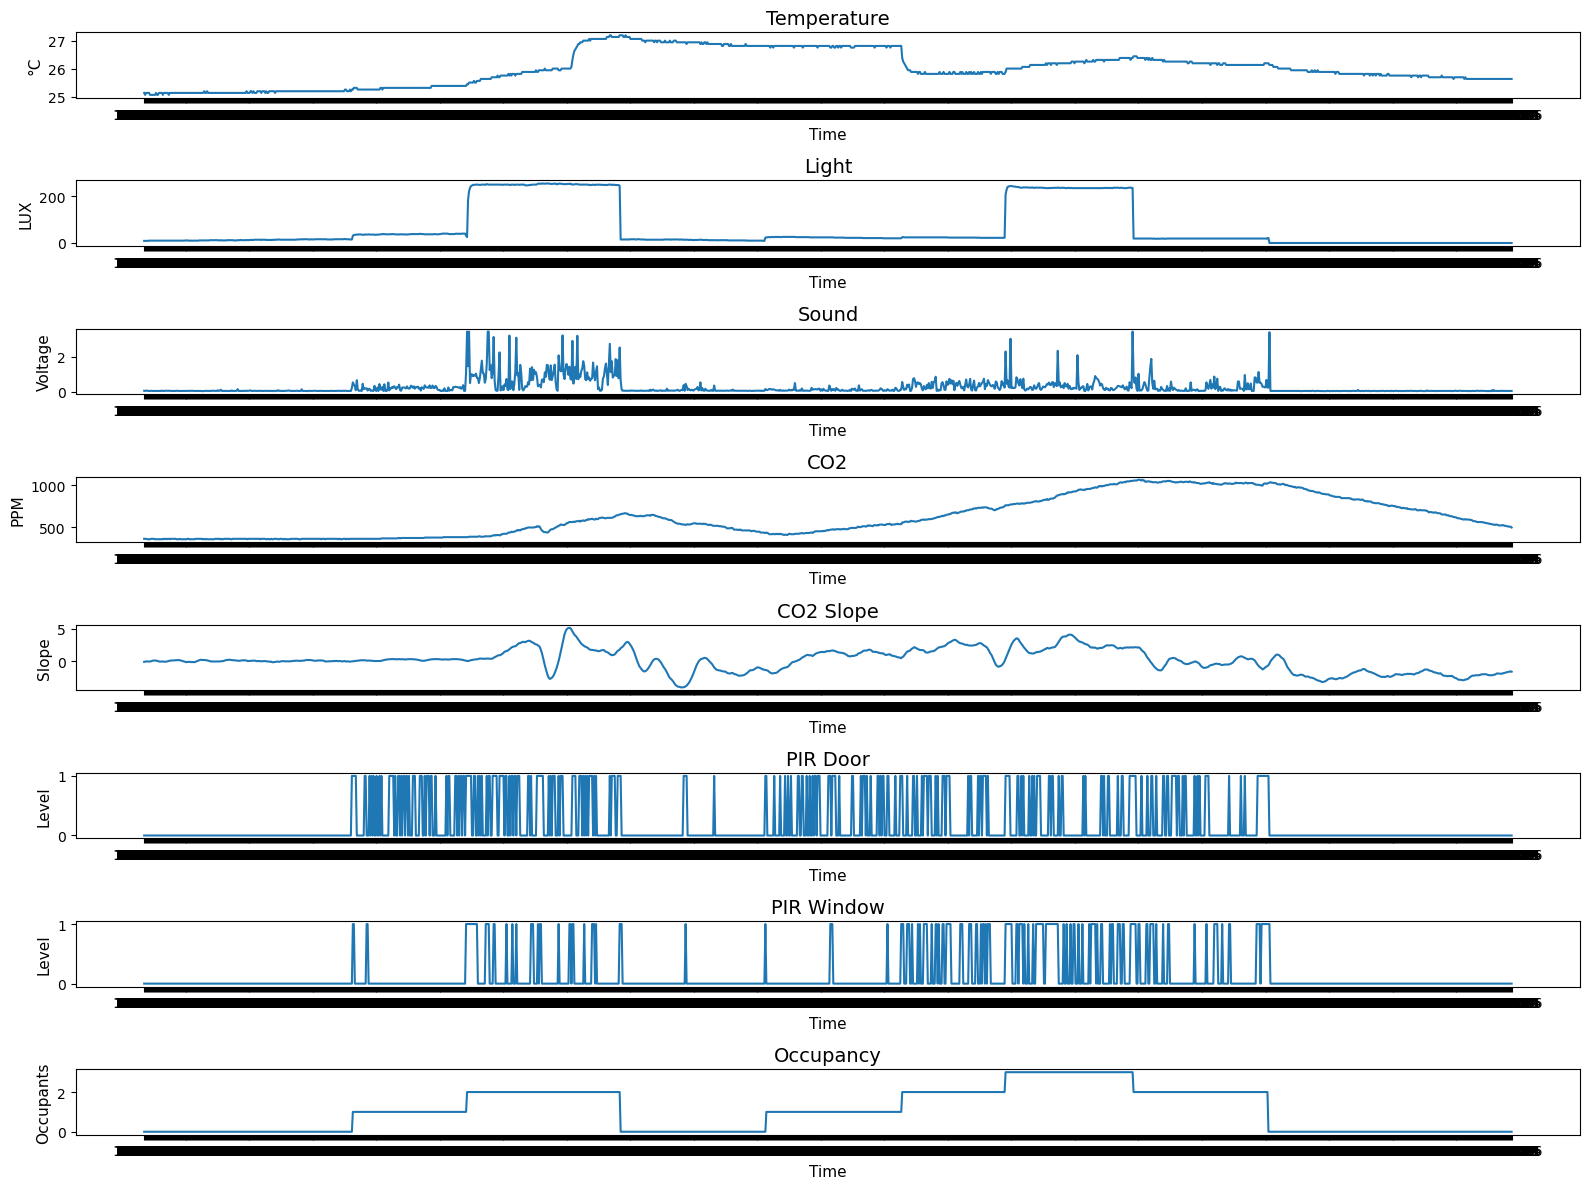

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Line Plot for Sensor 2 all variables, CO2 Sensor 5, PIR Sensor 6, PIR Sensor 7 and Occupancy against time 

#Code Source: McKinney 2022, Stack Overflow 2020a

#Creating subplots figure

fig, axes = plt.subplots(8,1, figsize = (16,12))

#Creating lists for y variable and x and y axis labels

sensor_name = ["Temperature", "Light", "Sound", "CO2", "CO2 Slope", "PIR Door", "PIR Window", "Occupancy"]
sensor_type = [y_axis_temp, y_axis_light, y_axis_sound, y_axis_CO2, y_axis_CO2_slope, y_axis_PIR_door, y_axis_PIR_window, y_axis_occupancy]
sensor_value = ["°C", "LUX", "Voltage", "PPM", "Slope", "Level", "Level", "Occupants"]

#Plotting for loop of graphs. Note: This takes a little while to run.

for i, axes in enumerate(axes.flatten()):
    axes.plot(x_axis, sensor_type[i])
    axes.set_title(sensor_name[i], fontsize = 14)
    axes.set_xlabel("Time", fontsize = 11)
    axes.set_ylabel(sensor_value[i], fontsize=11)
 
#Showing outputs and saving graph

plt.tight_layout()
#plt.savefig('Line_Plot_23_12_Sensor 2.png')
plt.show()


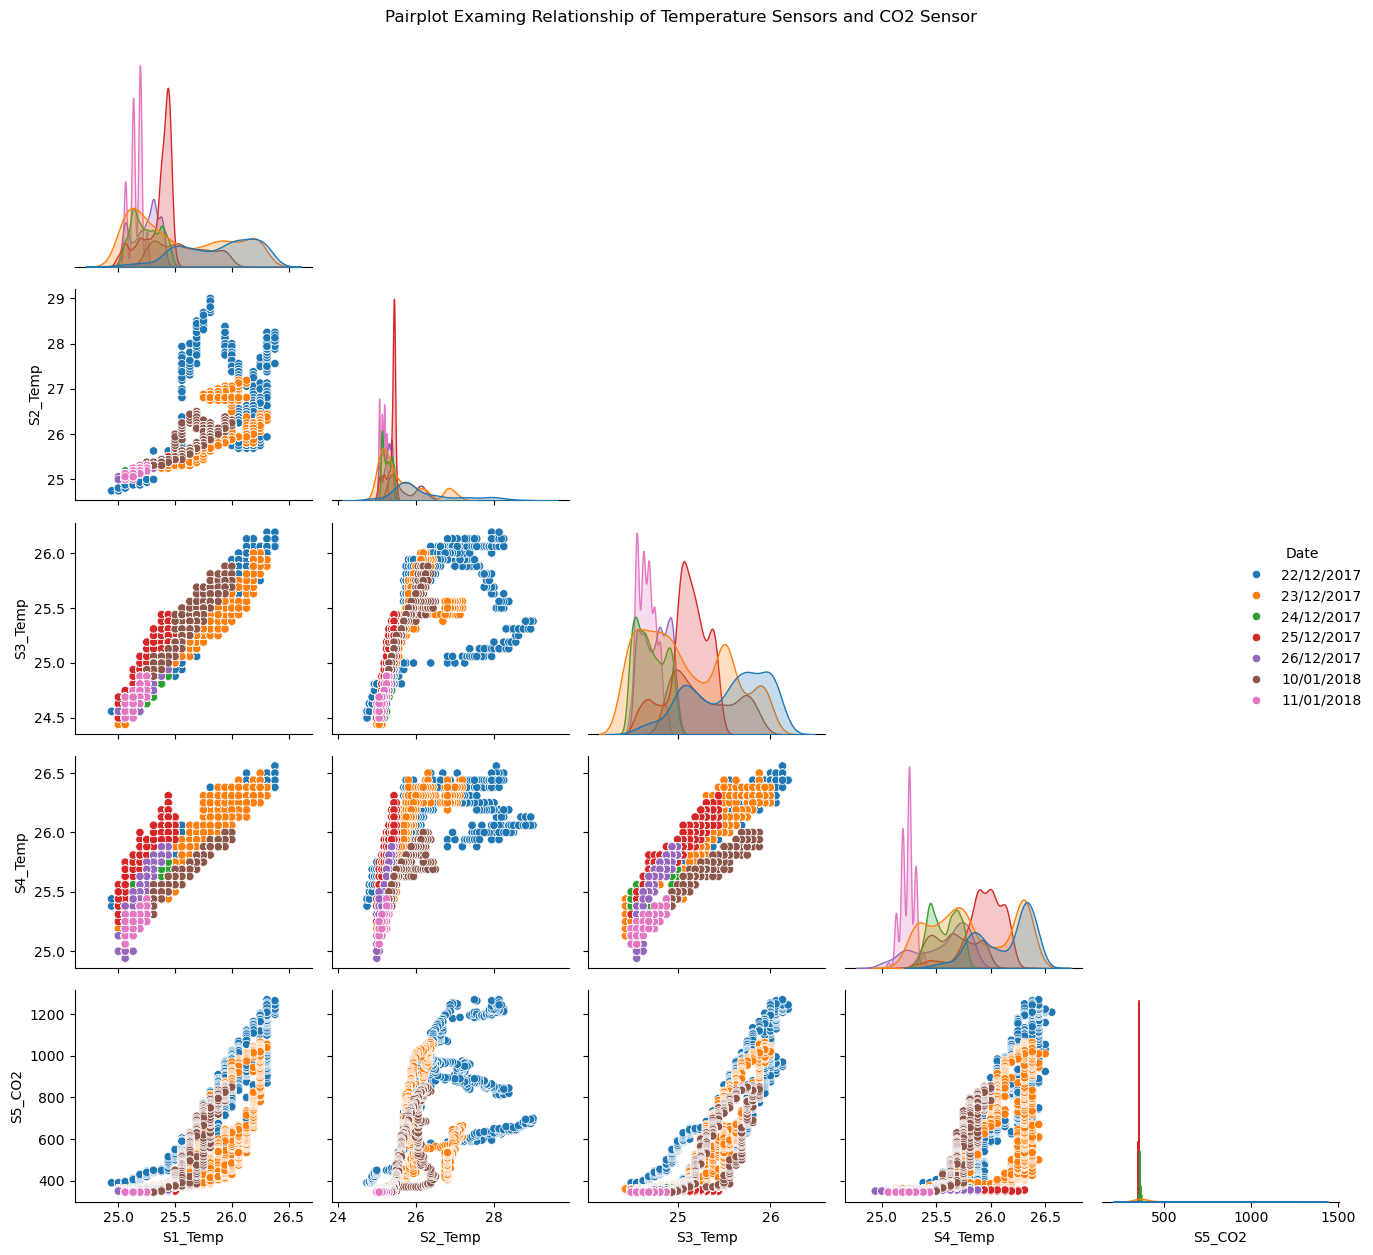

In [238]:
import seaborn as sns

#Code Source: McKinney 2022, Stack Overflow 2024, Seaborn 2024a

#Plotting pairplot

pairplot1 = sns.pairplot(df_pairplot9, hue = "Date", corner = True)

#Creating plot title

pairplot1.figure.suptitle("Pairplot Examing Relationship of Temperature Sensors and CO2 Sensor", y = 1)

#Showing plot

plt.tight_layout()
plt.show()

#Option to save plot

#plt.savefig("Pairplot15.png")


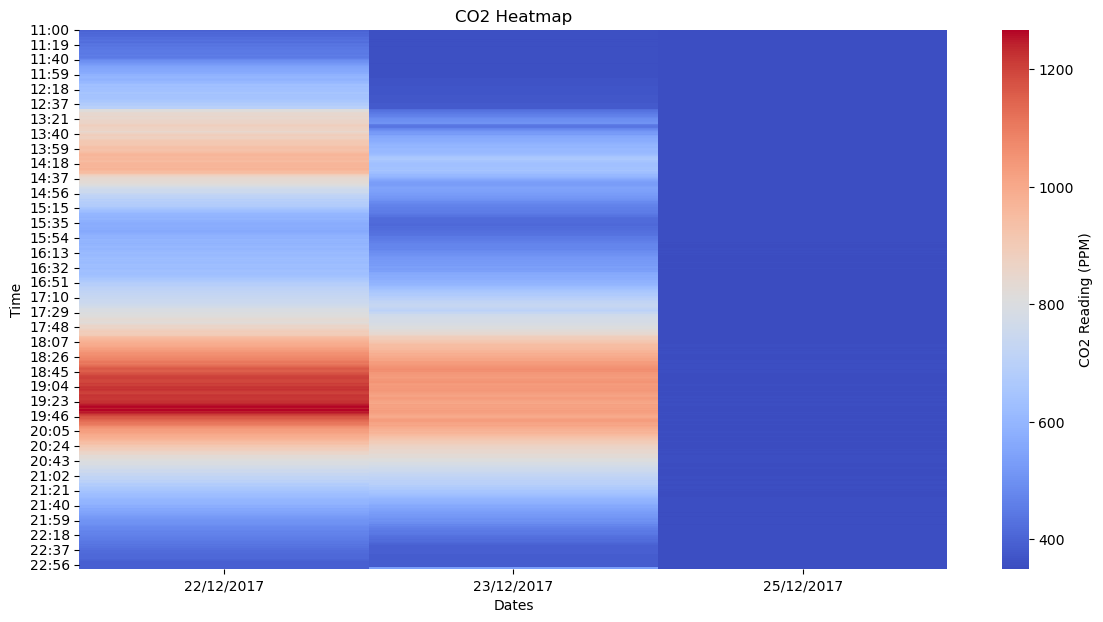

In [16]:
#CO2 heatmap plotting

#Code Source: GeeksforGeeks 2025j, Stack Overflow 2023b, Stack Overflow 2018

#Creating figure space

plt.figure(figsize=(14,7))

#Plotting heatmap

heatmap_plot = sns.heatmap(heatmap_df, cmap = "coolwarm", cbar_kws={"label": "CO2 Reading (PPM)"})

#Labelling heatmap

plt.title("CO2 Heatmap")
plt.xlabel("Dates")
plt.ylabel("Time")

#Showing plot

plt.show()

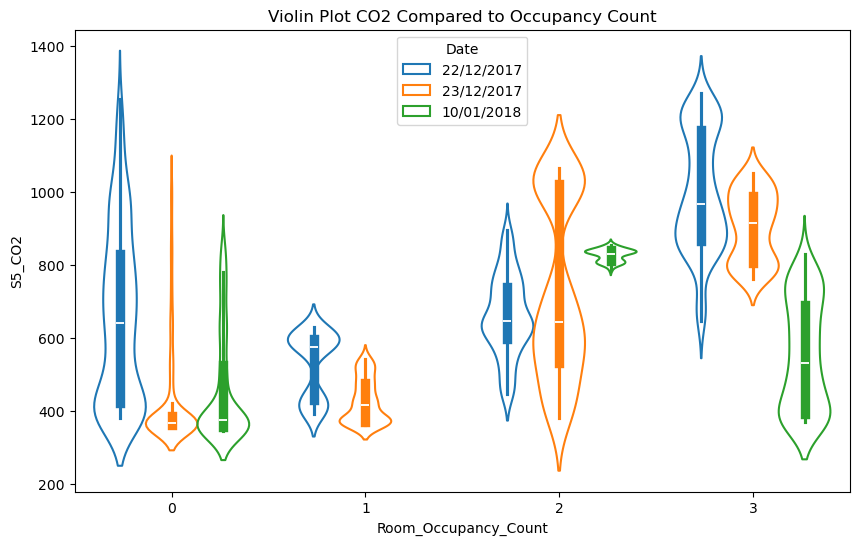

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Creation of violin plot

#Code Source: Seaborn 2024b, GeeksforGeeks 2025c

#Creating figure space

plt.figure(figsize = (10,6))

#Creating plot

violin_plot = sns.violinplot(data = df_violinplot_date_filter, x = "Room_Occupancy_Count", y = "S5_CO2", hue = "Date", density_norm = "width", fill = False)

#Showing plot

plt.title("Violin Plot CO2 Compared to Occupancy Count")
plt.show()

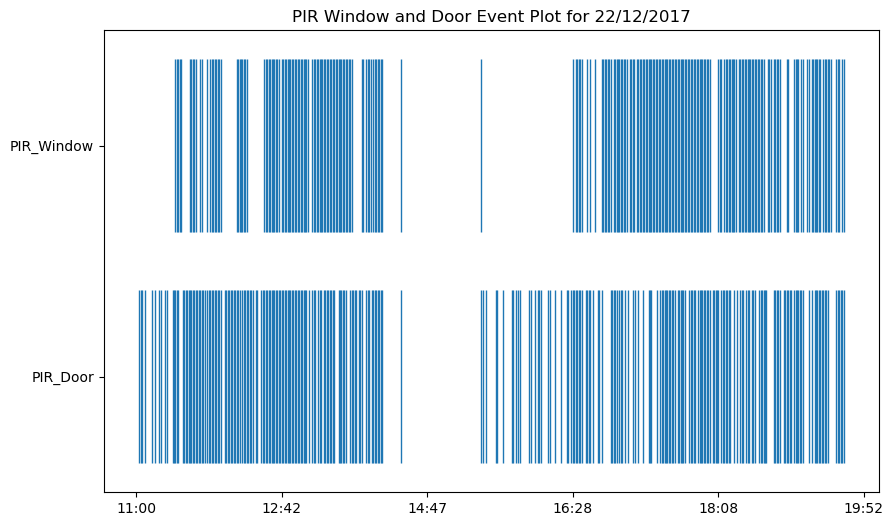

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Event plot

#Code Source: Tutorials Point 2026, Matplotlib 2012

#List creation for current plot tick position

tick_position = [0,100,200,300,400,500]

#List creation of new x_tick labels.

x_tick_labels = ["11:00", "12:42", "14:47", "16:28", "18:08", "19:52"]  

#Initialising figure space

fig_event = plt.figure(figsize = (10,6))

#Event plotting

plt.eventplot(positions = [event_time_number_list_D, event_time_number_list_W], lineoffsets = [1,2], linewidth = 1, linelength = 0.75)

#Figure heading

plt.title("PIR Window and Door Event Plot for 22/12/2017")

#Adding new x-ticks and y-ticks

plt.xticks(tick_position, x_tick_labels)

plt.yticks([1,2], ["PIR_Door", "PIR_Window"])

#Resizing y-axis

plt.ylim(0.5, 2.5)

#Showing figure

plt.show()


Text(0.5, 1.0, 'Linear Discriminant Analysis on Temperature Variables')

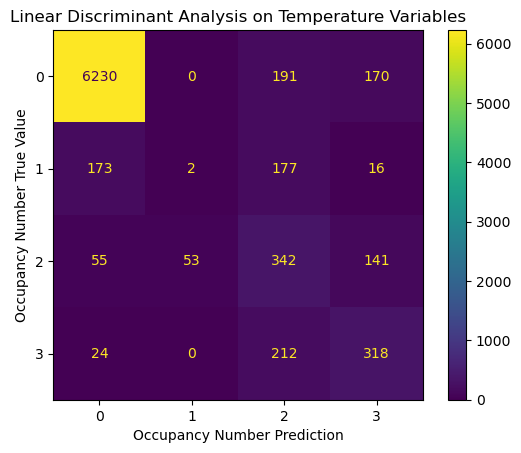

In [72]:
#Confusion Matrix Plot

#Code Source: W3Schools 2026, Stack Overflow 2023d

#Creating confusion matrix

confusion_matrix_lda = confusion_matrix(Y_test, Y_predict_lda)

#Creating confusion matrix plot display

confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix_lda)

#Plotting confusion matrix

confusion_matrix_display.plot()

#Getting figure space

fig_confusion = confusion_matrix_display.ax_.get_figure()

#Titling plot and labelling x and y axis

plt.xlabel("Occupancy Number Prediction")
plt.ylabel("Occupancy Number True Value")
plt.title("Linear Discriminant Analysis on Temperature Variables", fontsize = 12)

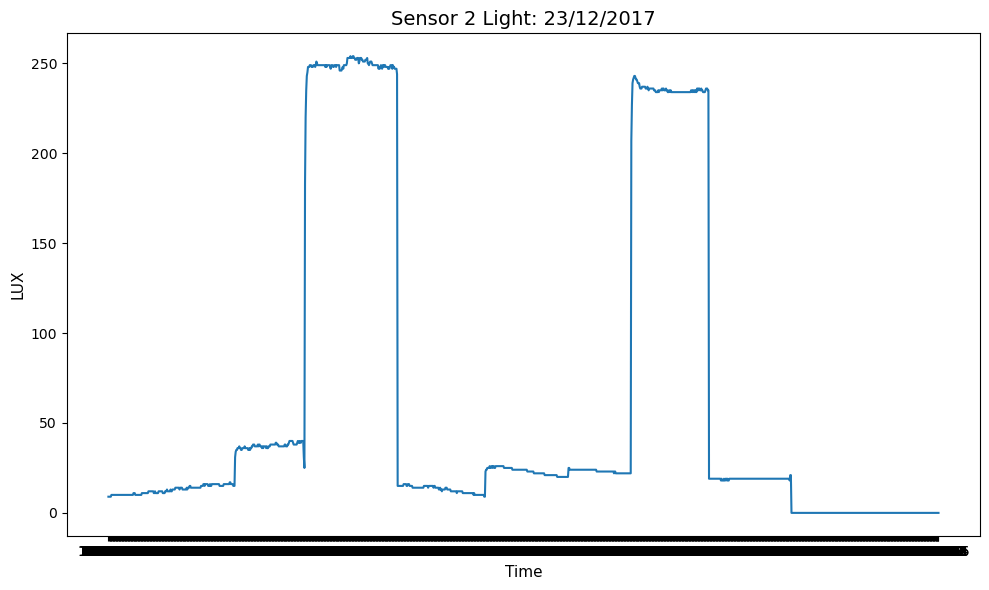

In [232]:
#Seperating subplot for GUI

#Line Plot for Sensor 2 Light

#Code Source: McKinney 2022, Stack Overflow 2020a

#Creating figure space

fig_Light = plt.figure(figsize = (10,6))

#Plotting graphs

line_plot_light = plt.plot(x_axis, sensor_type[1])
plt.title(f"Sensor 2 {sensor_name[1]}: 23/12/2017", fontsize = 14)
plt.xlabel("Time", fontsize = 11)
plt.ylabel(sensor_value[1], fontsize=11)

#Showing outputs and saving graph

plt.tight_layout()
plt.show()


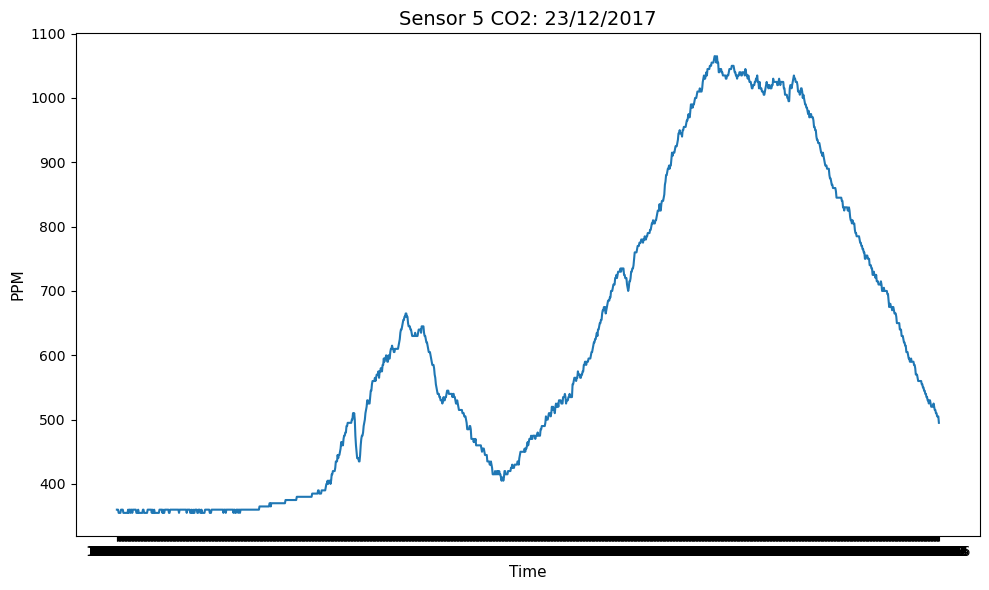

In [231]:
#Seperating subplot for GUI

#Line Plot for Sensor 2 Light

#Code Source: McKinney 2022, Stack Overflow 2020a

#Creating figure space

fig_CO2 = plt.figure(figsize = (10,6))

#Plotting graphs

line_plot_CO2 = plt.plot(x_axis, sensor_type[3])
plt.title(f"Sensor 5 {sensor_name[3]}: 23/12/2017", fontsize = 14)
plt.xlabel("Time", fontsize = 11)
plt.ylabel(sensor_value[3], fontsize=11)

#Showing outputs and saving graph

plt.tight_layout()
plt.show()

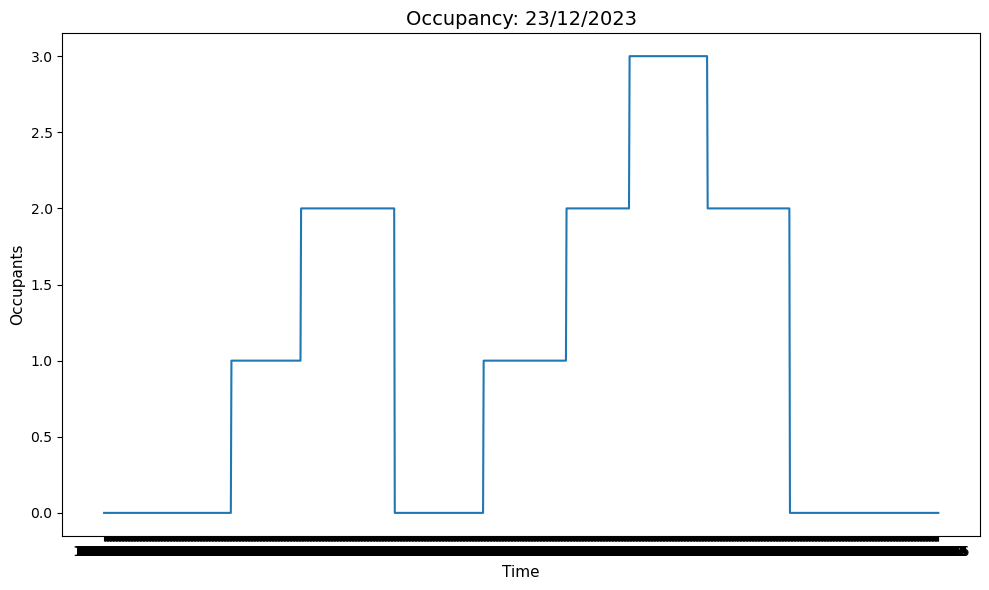

In [233]:
#Seperating subplot for GUI

#Line Plot for Sensor 2 Light

#Code Source: McKinney 2022, Stack Overflow 2020a

#Creating figure space

fig_Occupancy = plt.figure(figsize = (10,6))

#Plotting graphs

lineplot_Occupancy = plt.plot(x_axis, sensor_type[7])
plt.title(f"{sensor_name[7]}: 23/12/2023", fontsize = 14)
plt.xlabel("Time", fontsize = 11)
plt.ylabel(sensor_value[7], fontsize=11)

#Showing outputs and saving graph

plt.tight_layout()
plt.show()

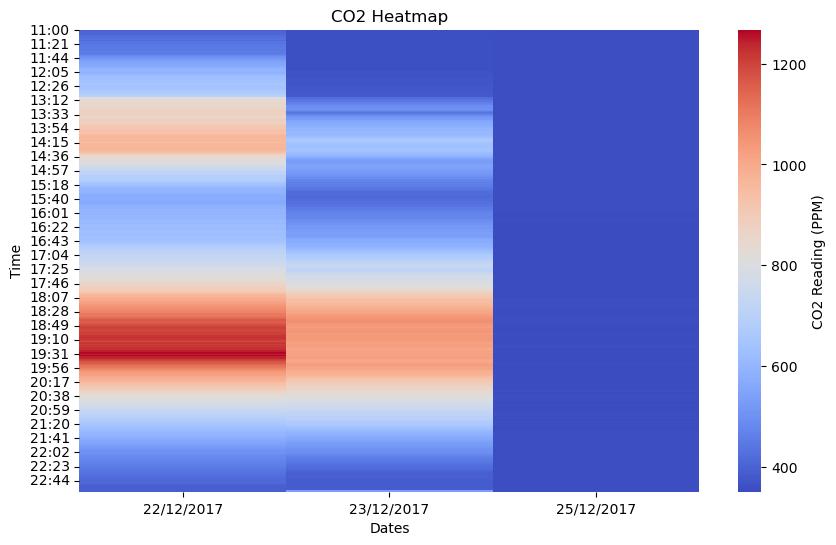

In [85]:
#CO2 Heatmap Plot for GUI

#Code Source: GeeksforGeeks 2025j, Stack Overflow 2023b, Stack Overflow 2018

#Creating figure space

plt.figure(figsize=(10,6))

#Plotting heatmap

heatmap_plot_gui = sns.heatmap(heatmap_df, cmap = "coolwarm", cbar_kws={"label": "CO2 Reading (PPM)"})

#Labelling heatmap

plt.title("CO2 Heatmap")
plt.xlabel("Dates")
plt.ylabel("Time")

#Showing plot

plt.show()

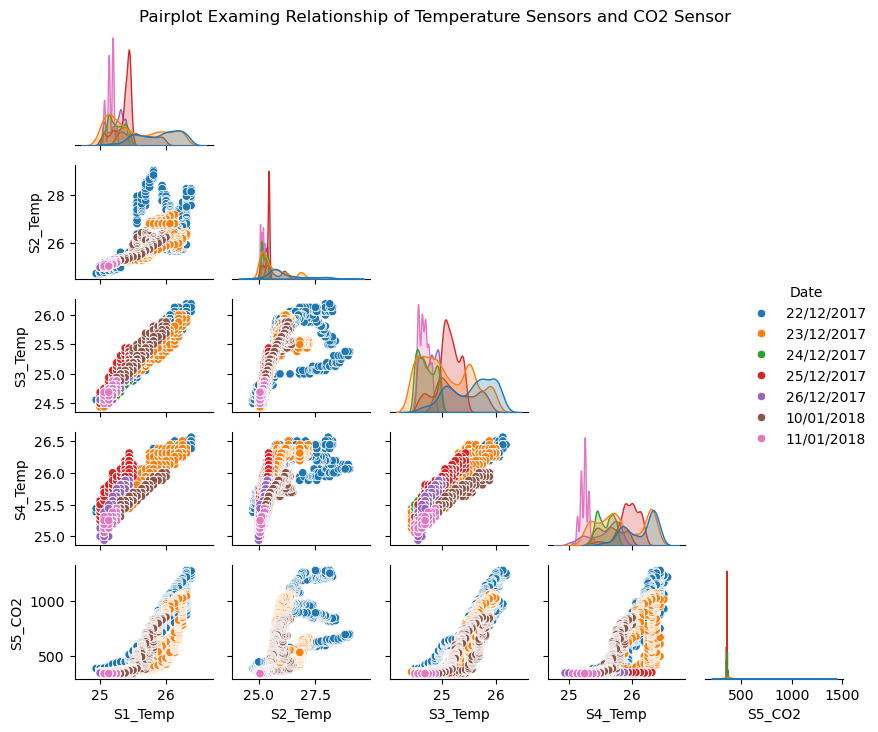

In [104]:
#Resizing Pairplot for GUI

#Plotting resized pairplot

#Code Source: McKinney 2022, Stack Overflow 2024, Seaborn 2024a

pairplot1_gui = sns.pairplot(df_pairplot9, hue = "Date", corner = True, height = 1.5)

#Creating plot title

pairplot1_gui.figure.suptitle("Pairplot Examing Relationship of Temperature Sensors and CO2 Sensor", y = 0.97)

#Showing plot

plt.tight_layout()
plt.show()

In [ ]:
# Reflection on results 

# Section 5: GUI Development (16 marks)  

In [ ]:
# Explanation and Documentation 

In [229]:
import tkinter as tk
from tkinter import *
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

#GUI to View Plots

#Code Source: Arif Rahman 2024, Python Tutorial 2021, GeeksforGeeks 2025a
#Modified by: Dylan Butterfield

#Creating pop out window, titling and setting size

root = tk.Tk()
root.title("Graphical Outputs Exploration")
root.geometry("1400x700")

#Frame creation to hold list box

listbox_frame = ttk.Frame(root)
listbox_frame.pack(side = "left", padx = 20, pady=20)

#Frame creation to hold plots

plot_frame = ttk.Frame(root)
plot_frame.pack(side = "right", padx = 20, pady = 20, fill= "both", expand=True)

#Creating label and listbox to store list of graph names

listbox = Listbox(root, heigh = 10, width = 20)
label = Label(root, text = "Plot Selection")

listbox.insert(1, "Line Plot Light")
listbox.insert(2, "Line Plot CO2")
listbox.insert(3, "Line Plot Occupancy")
listbox.insert(4, "Pairplot")
listbox.insert(5, "Heatmap")
listbox.insert(6, "Violin Plot")
listbox.insert(7, "Event Plot")
listbox.insert(8, "LDA Confusion Matrix")

#Placing listbox into window

label.pack()
listbox.pack()

#Binding action to listbox to call graph selection function when double clicking on list item

listbox.bind("<<ListboxSelect>>", graph_selection)

#Run the Tkinter event to open the window

root.mainloop()


In [230]:
#GUI to View Filtered DataFrame

#Code Source: Python Assets 2023b, GeeksforGeeks 2025b, GeeksforGeeks 2022, GeeksforGeeks 2025g, Python Assets 2023a, Stack Overflow 2023b

#Creating pop out window, titling and setting size

window = tk.Tk()
window.geometry("1300x700")
window.title("Filtered DataFrame Maximum Values 22/12/2017")

#Creating treeview widget and detailing the column headings to store

table = ttk.Treeview(window, columns = column_headings, show = "headings")

#Creating x and y scrollbar for table

scrollbarx = ttk.Scrollbar(window, orient = "horizontal", command = table.xview)
scrollbary = ttk.Scrollbar(window, orient = "vertical", command = table.yview)

#Placing table and scrollbars into window

table.place(relx=0.01, rely=0.05, width = 1190, height = 600)
scrollbary.place(relx = 0.93, rely = 0.05, width = 22, height = 620)
scrollbarx.place(relx = 0.002, rely = 0.92, width = 1200, height = 22)

#Linking scroll bars to table

table.configure(yscrollcommand = scrollbary.set, xscrollcommand = scrollbarx.set)

#Placing and formatting column headings

for i in range(0,len(column_headings)):
    table.column(column_headings[i], anchor = "c")
    table.heading(column_headings[i], text = column_headings[i])

#Populating table entries

for j in range(0, len(list_22_12_17)):
    element = list_22_12_17[j]
    data = tuple(element)  
    table.insert(parent = "", index = "end", values = data)

#Run the Tkinter event to open the window

window.mainloop()


In [24]:
# Reflection on results 

# Section 6: Conclusion: Version Control, Critical Appraisal, Documentation (24 marks)  

In [ ]:
# Explanation and Documentation 

# References:


# Appendix:

(If any)